In [1]:
print("hello")

hello


In [2]:

# def align_bio_to_tokens(text: str, char_bio: List[str], tokenizer, label2id: Dict[str, int]) -> Dict[str, Any]:
#     # 1) Normalize text
#     norm_text, norm_to_orig = preprocess_text_with_mapping(text, do_lower=True, apply_translit_map=True)

#     # 2) Map BIO to normalized space
#     n_orig = len(char_bio)
#     char_bio_norm: List[str] = ["O"] * len(norm_text)
#     for j, i_orig in enumerate(norm_to_orig):
#         if 0 <= i_orig < n_orig:
#             char_bio_norm[j] = char_bio[i_orig]

#     # 3) Tokenize
#     enc = tokenizer(
#         norm_text,
#         return_offsets_mapping=True,
#         truncation=True,
#         max_length=MAX_SEQ_LEN,
#         padding=False,
#     )
#     offsets = enc["offset_mapping"]

#     # 4) Assign labels by majority overlap (>=50%) and B/I by previous char
#     token_labels: List[int] = []
#     for start, end in offsets:
#         if end == 0 and start == 0:
#             token_labels.append(-100)
#             continue
#         if start == end:
#             token_labels.append(-100)
#             continue

#         span_end = min(end, len(char_bio_norm))
#         span_len = max(0, span_end - start)
#         if span_len == 0:
#             token_labels.append(-100)
#             continue

#         type_counts: Dict[str, int] = {}
#         first_pos_for_type: Dict[str, int] = {}
#         for pos in range(start, span_end):
#             tag = char_bio_norm[pos]
#             if tag == "O" or tag is None:
#                 continue
#             etype = tag.split("-", 1)[1] if "-" in tag else tag
#             type_counts[etype] = type_counts.get(etype, 0) + 1
#             if etype not in first_pos_for_type:
#                 first_pos_for_type[etype] = pos

#         if not type_counts:
#             token_labels.append(label2id["O"])
#             continue

#         majority_etype = max(type_counts.items(), key=lambda kv: kv[1])[0]
#         maj_count = type_counts[majority_etype]
#         if maj_count / float(span_len) < 0.5:
#             token_labels.append(label2id["O"])
#             continue

#         first_pos = first_pos_for_type[majority_etype]
#         if first_pos > 0 and str(char_bio_norm[first_pos - 1]).endswith(majority_etype):
#             tok_tag = f"I-{majority_etype}"
#         else:
#             tok_tag = f"B-{majority_etype}"
#         token_labels.append(label2id.get(tok_tag, label2id["O"]))

#     enc["labels"] = token_labels
#     enc["offset_mapping"] = offsets
#     enc["normalized_text"] = norm_text
#     return enc


In [3]:
# import sys, pyparsing, packaging
# print(sys.executable)
# print("pyparsing:", pyparsing.__version__)
# print("packaging:", packaging.__version__)

In [4]:
import sys, sysconfig, site; print(sys.executable); print(sys.version); print(site.getsitepackages())

/Users/marina/Documents/projects/X5/x5_ner_env_new/bin/python
3.9.6 (default, Apr 30 2025, 02:07:17) 
[Clang 17.0.0 (clang-1700.0.13.5)]
['/Users/marina/Documents/projects/X5/x5_ner_env_new/lib/python3.9/site-packages']


In [5]:
# %pip install --no-cache-dir --index-url https://download.pytorch.org/whl/cu121 torch==2.5.1 torchvision==0.20.1 torchaudio==2.5.1

In [6]:
# %pip install accelerate==1.10.1
# %pip install aiohappyeyeballs==2.6.1
# %pip install aiohttp==3.12.15
# %pip install aiosignal==1.4.0
# %pip install annotated-types==0.7.0
# %pip install anyio==4.10.0
# %pip install appnope==0.1.4
# %pip install argon2-cffi==25.1.0
# %pip install argon2-cffi-bindings==25.1.0
# %pip install arrow==1.3.0
# %pip install asttokens==3.0.0
# %pip install async-lru==2.0.5
# %pip install async-timeout==5.0.1
# %pip install attrs==25.3.0
# %pip install babel==2.17.0
# %pip install beautifulsoup4==4.13.5
# %pip install bleach==6.2.0
# %pip install certifi==2025.8.3
# %pip install cffi==2.0.0
# %pip install charset-normalizer==3.4.3
# %pip install click==8.1.8
# %pip install coloredlogs==15.0.1
# %pip install comm==0.2.3
# %pip install contourpy==1.3.0
# %pip install cycler==0.12.1
# %pip install datasets==4.1.1
# %pip install debugpy==1.8.17
# %pip install decorator==5.2.1
# %pip install defusedxml==0.7.1
# %pip install dill==0.4.0
# %pip install evaluate==0.4.6
# %pip install exceptiongroup==1.3.0
# %pip install executing==2.2.1
# %pip install fastapi==0.117.1
# %pip install fastjsonschema==2.21.2
# %pip install filelock==3.19.1
# %pip install flatbuffers==25.2.10
# %pip install fonttools==4.60.0
# %pip install fqdn==1.5.1
# %pip install frozenlist==1.7.0
# %pip install fsspec==2025.9.0
# %pip install gunicorn==23.0.0
# %pip install h11==0.16.0
# %pip install hf-xet==1.1.10
# %pip install httpcore==1.0.9
# %pip install httpx==0.28.1
# %pip install huggingface-hub==0.35.0
# %pip install humanfriendly==10.0
# %pip install idna==3.10
# %pip install importlib_metadata==8.7.0
# %pip install importlib_resources==6.5.2
# %pip install iniconfig==2.1.0
# %pip install ipykernel==6.30.1
# %pip install ipython==8.18.1
# %pip install ipywidgets==8.1.7
# %pip install isoduration==20.11.0
# %pip install jedi==0.19.2
# %pip install Jinja2==3.1.6
# %pip install joblib==1.5.2
# %pip install json5==0.12.1
# %pip install jsonpointer==3.0.0
# %pip install jsonschema==4.25.1
# %pip install jsonschema-specifications==2025.9.1
# %pip install jupyter==1.1.1
# %pip install jupyter-console==6.6.3
# %pip install jupyter-events==0.12.0
# %pip install jupyter-lsp==2.3.0
# %pip install jupyter_client==8.6.3
# %pip install jupyter_core==5.8.1
# %pip install jupyter_server==2.17.0
# %pip install jupyter_server_terminals==0.5.3
# %pip install jupyterlab==4.4.7
# %pip install jupyterlab_pygments==0.3.0
# %pip install jupyterlab_server==2.27.3
# %pip install jupyterlab_widgets==3.0.15
# %pip install kiwisolver==1.4.7
# %pip install lark==1.2.2
# %pip install MarkupSafe==3.0.2
# %pip install matplotlib==3.9.4
# %pip install matplotlib-inline==0.1.7
# %pip install mistune==3.1.4
# %pip install mpmath==1.3.0
# %pip install multidict==6.6.4
# %pip install multiprocess==0.70.16
# %pip install nbclient==0.10.2
# %pip install nbconvert==7.16.6
# %pip install nbformat==5.10.4
# %pip install nest-asyncio==1.6.0
# %pip install networkx==3.2.1
# %pip install notebook==7.4.5
# %pip install notebook_shim==0.2.4
# %pip install numpy==2.0.2
# %pip install onnxruntime==1.19.2
# %pip install overrides==7.7.0
# %pip install packaging==25.0
# %pip install pandas==2.3.2
# %pip install pandocfilters==1.5.1
# %pip install parso==0.8.5
# %pip install pexpect==4.9.0
# %pip install pillow==11.3.0
# %pip install platformdirs==4.4.0
# %pip install pluggy==1.6.0
# %pip install prometheus_client==0.23.1
# %pip install prompt_toolkit==3.0.52
# %pip install propcache==0.3.2
# %pip install protobuf==6.32.1
# %pip install psutil==7.1.0
# %pip install ptyprocess==0.7.0
# %pip install pure_eval==0.2.3
# %pip install pyarrow==21.0.0
# %pip install pycparser==2.23
# %pip install pydantic==2.11.9
# %pip install pydantic_core==2.33.2
# %pip install Pygments==2.19.2
# %pip install pyparsing==3.2.4
# %pip install pytest==8.4.2
# %pip install python-dateutil==2.9.0.post0
# %pip install python-json-logger==3.3.0
# %pip install python-multipart==0.0.20
# %pip install pytz==2025.2
# %pip install PyYAML==6.0.2
# %pip install pyzmq==27.1.0
# %pip install referencing==0.36.2
# %pip install regex==2025.9.18
# %pip install requests==2.32.5
# %pip install rfc3339-validator==0.1.4
# %pip install rfc3986-validator==0.1.1
# %pip install rfc3987-syntax==1.1.0
# %pip install rpds-py==0.27.1
# %pip install safetensors==0.6.2
# %pip install scikit-learn==1.6.1
# %pip install scipy==1.13.1
# %pip install seaborn==0.13.2
# %pip install Send2Trash==1.8.3
# %pip install sentencepiece==0.2.0
# %pip install seqeval==1.2.2
# %pip install six==1.17.0
# %pip install sniffio==1.3.1
# %pip install soupsieve==2.8
# %pip install stack-data==0.6.3
# %pip install starlette==0.48.0
# %pip install sympy==1.14.0
# %pip install terminado==0.18.1
# %pip install threadpoolctl==3.6.0
# %pip install tiktoken==0.11.0
# %pip install tinycss2==1.4.0
# %pip install tokenizers==0.22.1
# %pip install tomli==2.2.1
# %pip install torch==2.8.0
# %pip install torchaudio==2.8.0
# %pip install torchvision==0.23.0
# %pip install tornado==6.5.2
# %pip install tqdm==4.67.1
# %pip install traitlets==5.14.3
# %pip install transformers==4.56.2
# %pip install types-python-dateutil==2.9.0.20250822
# %pip install typing-inspection==0.4.1
# %pip install typing_extensions==4.15.0
# %pip install tzdata==2025.2
# %pip install uri-template==1.3.0
# %pip install urllib3==2.5.0
# %pip install uvicorn==0.36.0
# %pip install wcwidth==0.2.13
# %pip install webcolors==24.11.1
# %pip install webencodings==0.5.1
# %pip install websocket-client==1.8.0
# %pip install widgetsnbextension==4.0.14
# %pip install xxhash==3.5.0
# %pip install yarl==1.20.1
# %pip install zipp==3.23.0


In [7]:
# %pip install --no-cache-dir --index-url https://download.pytorch.org/whl/cu121 torch==2.5.1 torchvision==0.20.1 torchaudio==2.5.1

In [8]:
# %pip install --no-cache-dir tiktoken==0.11.0

In [9]:
# %pip install --no-cache-dir tokenizers==0.22.1 sentencepiece==0.2.0
# %pip install --no-cache-dir "transformers==4.56.2" "tokenizers==0.22.1"

In [10]:
# %pip install --no-cache-dir -r requirements.txt

In [11]:
# import transformers, tokenizers
# print(transformers.__version__, tokenizers.__version__)

## 1. Global imports & environment
Import standard and third‑party libraries, and set global environment flags used across the notebook.


In [12]:
# Standard library
import ast
import datetime as _dt
import json
import math
import os
import platform
import random
import re
import sys
from collections import Counter, defaultdict
from typing import Any, Dict, List, Optional, Tuple


# Third-party
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import datasets
import transformers
from datasets import Dataset
from sklearn.model_selection import train_test_split
from transformers import (
    AutoModelForTokenClassification,
    AutoTokenizer,
    DataCollatorForTokenClassification,
    DebertaV2Tokenizer,
    DebertaV2TokenizerFast,
    Trainer,
    TrainingArguments,
    set_seed as hf_set_seed,
)
from dotenv import load_dotenv
from collections import Counter
# Project globals
os.environ["TOKENIZERS_PARALLELISM"] = "false"
import re
from collections import Counter
from typing import List, Dict, Tuple
import matplotlib.pyplot as plt
from transformers import AutoTokenizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

/Users/marina/Documents/projects/X5/x5_ner_env_new/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## 2. Reproducibility: global seeding and deterministic settings


In [13]:

plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print('Python:', sys.version.split()[0])
print('Pandas:', pd.__version__)

Python: 3.9.6
Pandas: 2.3.2


In [14]:
MAX_SEQ_LEN = 128
TEST_SIZE = 0.2
BRAND_BOOST = 2 
PERCENT_BOOST = 6

In [15]:
# 0. Reproducibility: global seeding and deterministic settings
# Imports are defined in the global imports cell

# Optional: set a single source of truth for seed
SEED = int(os.getenv("X5_SEED", "42"))

# Strengthen determinism for Python hashing and CUDA libraries
os.environ["PYTHONHASHSEED"] = str(SEED)
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":16:8"

# Python/NumPy RNGs
random.seed(SEED)
np.random.seed(SEED)

# PyTorch thread limits and determinism
try:
    # Limit CPU threads explicitly (in addition to OMP/MKL env)
    try:
        torch.set_num_threads(int(os.getenv("TORCH_NUM_THREADS", "1")))
        torch.set_num_interop_threads(int(os.getenv("TORCH_NUM_INTEROP_THREADS", "1")))
    except Exception:
        pass

    # RNGs
    torch.manual_seed(SEED)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(SEED)
        torch.cuda.manual_seed_all(SEED)

    # CuDNN deterministic
    if hasattr(torch.backends, "cudnn"):
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

    # Enforce deterministic algorithms when supported
    try:
        torch.use_deterministic_algorithms(True)
    except Exception:
        pass
except Exception as _e:
    print("[seed] PyTorch not available or failed to set deterministic flags:", _e)

# Transformers seed
try:
    hf_set_seed(SEED)
except Exception:
    pass

print(f"[seed] Global seed set to {SEED}")

[seed] Global seed set to 42


In [16]:
# Type alias for entity spans
Span = Tuple[int, int, str]

## 3. Functions

In [17]:
# 2) Path helpers

def get_runs_dir(model_alias: Optional[str] = None, run_id: Optional[str] = None) -> str:
    """Get runs dir.
    
    Args:
        model_alias: Parameter.
        run_id: Parameter.
    
    Returns:
        Return value.
    """
    alias = model_alias or MODEL_ALIAS
    rid = run_id or RUN_ID
    return os.path.join('.', 'ner_runs', alias, rid)


def get_artifacts_dir(model_alias: Optional[str] = None, run_id: Optional[str] = None) -> str:
    """Get artifacts dir.
    
    Args:
        model_alias: Parameter.
        run_id: Parameter.
    
    Returns:
        Return value.
    """
    alias = model_alias or MODEL_ALIAS
    rid = run_id or RUN_ID
    return os.path.join('.', 'artifacts', alias, rid)


def get_latest_alias_dir(model_alias: Optional[str] = None) -> str:
    """Get latest alias dir.
    
    Args:
        model_alias: Parameter.
    
    Returns:
        Return value.
    """
    alias = model_alias or MODEL_ALIAS
    return os.path.join('.', 'artifacts', alias, 'latest')


def get_submission_dir(model_alias: Optional[str] = None, run_id: Optional[str] = None) -> str:
    """Get submission dir.
    Args:
        model_alias: Parameter.
        run_id: Parameter.
    Returns:
        Return value.
    """
    alias = model_alias or MODEL_ALIAS
    rid = run_id or RUN_ID
    return os.path.join('.', 'submission', alias, rid)


def get_eval_dir(model_alias: Optional[str] = None, run_id: Optional[str] = None) -> str:
    """Get eval dir.
    
    Args:
        model_alias: Parameter.
        run_id: Parameter.
    
    Returns:
        Return value.
    """
    alias = model_alias or MODEL_ALIAS
    rid = run_id or RUN_ID
    return os.path.join('.', f'eval_out_{os.getenv("SERVICE_PORT", "8080")}', alias, rid)


# 3) Latest alias management

def _safe_symlink(target: str, link_name: str) -> None:
    """Safe symlink.
    
    Args:
        target: Parameter.
        link_name: Parameter.
    
    Returns:
        Return value.
    """
    try:
        if os.path.islink(link_name) or os.path.exists(link_name):
            try:
                os.remove(link_name)
            except Exception:
                pass
        os.symlink(target, link_name)
    except Exception:
        # Fallback: write a pointer file
        os.makedirs(os.path.dirname(link_name), exist_ok=True)
        with open(os.path.join(os.path.dirname(link_name), 'latest.txt'), 'w', encoding='utf-8') as f:
            f.write(os.path.basename(target))


def update_latest_alias(model_alias: Optional[str] = None, run_id: Optional[str] = None) -> None:
    """Update latest alias.
    
    Args:
        model_alias: Parameter.
        run_id: Parameter.
    
    Returns:
        Return value.
    """
    alias = model_alias or MODEL_ALIAS
    rid = run_id or RUN_ID
    link_path = get_latest_alias_dir(alias)
    target = get_artifacts_dir(alias, rid)
    os.makedirs(os.path.dirname(link_path), exist_ok=True)
    _safe_symlink(target=target, link_name=link_path)


def read_latest_run_id(model_alias: Optional[str] = None) -> Optional[str]:
    """Read latest run id.
    
    Args:
        model_alias: Parameter.
    
    Returns:
        Return value.
    """
    alias = model_alias or MODEL_ALIAS
    link_path = get_latest_alias_dir(alias)
    txt = os.path.join(os.path.dirname(link_path), 'latest.txt')
    if os.path.islink(link_path):
        try:
            tgt = os.readlink(link_path)
            return os.path.basename(tgt.rstrip('/'))
        except Exception:
            pass
    if os.path.exists(txt):
        try:
            with open(txt, 'r', encoding='utf-8') as f:
                return f.read().strip()
        except Exception:
            return None
    return None


In [18]:
# 4) Dynamic tokenizer loader (fast→slow fallback)
def load_tokenizer_dynamic(model_name: str, prefer_fast: bool = True):
    """
    Universal load of tokenizer.
    - mDeBERTa-v3 / DeBERTa-v2 → DebertaV2TokenizerFast (or DebertaV2Tokenizer fallback).
    - Остальные → AutoTokenizer.
    """

    ln = (model_name or "").lower()

    # 1) DeBERTa class (including mdeberta-v3)
    if "deberta" in ln:
        try:
            print(f"[Tokenizer] Using DebertaV2TokenizerFast for {model_name}")
            return DebertaV2TokenizerFast.from_pretrained(model_name)
        except Exception as e_fast:
            print(f"[Tokenizer] Fast tokenizer unavailable, fallback to DebertaV2Tokenizer: {e_fast}")
            return DebertaV2Tokenizer.from_pretrained(model_name)

    # 2) Other models (ruBERT-tiny, rubert-base-cased, etc.)
    try:
        print(f"[Tokenizer] Using AutoTokenizer ({'fast' if prefer_fast else 'slow'}) for {model_name}")
        return AutoTokenizer.from_pretrained(model_name, use_fast=prefer_fast, trust_remote_code=False)
    except Exception as e:
        raise RuntimeError(f"Failed to load tokenizer for {model_name}.\nOriginal error: {e}")

In [19]:
def parse_annotation(s):
    """Parse annotation.
    
    Args:
        s: Parameter.
    """
    try:
        return ast.literal_eval(s)
    except Exception:
        return []
        
def has_type(ann, t):
    """Has type.
    
    Args:
        ann: Parameter.
        t: Parameter.
    """
    return any((tag != 'O' and '-' in tag and tag.split('-',1)[1] == t) for _,_,tag in ann)

In [20]:
#preprocessing functions

def _is_latin(ch: str) -> bool:
    """Is latin.
    
    Args:
        ch: Parameter.
    
    Returns:
        Return value.
    """
    return bool(_lat.match(ch))

def _is_cyrillic(ch: str) -> bool:
    """Is cyrillic.
    
    Args:
        ch: Parameter.
    
    Returns:
        Return value.
    """
    return bool(_cyr.match(ch))


def _token_script_stats(tok: str) -> Tuple[int,int]:
    """Token script stats.
    
    Args:
        tok: Parameter.
    
    Returns:
        Return value.
    """
    lat = sum(1 for ch in tok if _is_latin(ch))
    cyr = sum(1 for ch in tok if _is_cyrillic(ch))
    return lat, cyr


def _normalize_mixed_script_token(tok: str) -> str:
    """Normalize mixed script token.
    
    Args:
        tok: Parameter.
    
    Returns:
        Return value.
    """
    lat, cyr = _token_script_stats(tok)
    if lat == 0 or cyr == 0:
        return tok
    if cyr >= lat:
        return ''.join(LAT_TO_CYR.get(ch, ch) for ch in tok)
    return ''.join(CYR_TO_LAT.get(ch, ch) for ch in tok)


def _normalize_digit_letter_confusables(tok: str) -> str:
    """Normalize digit letter confusables.
    
    Args:
        tok: Parameter.
    
    Returns:
        Return value.
    """
    if not tok:
        return tok
    chars = list(tok)
    n = len(chars)
    for i, ch in enumerate(chars):
        if i>0 and i+1<n and chars[i-1].isalpha() and chars[i+1].isalpha():
            if ch in DIGIT_TO_LETTER:
                chars[i] = DIGIT_TO_LETTER[ch]
    return ''.join(chars)


def _normalize_simple_subs(tok: str) -> str:
    """Normalize simple subs.
    
    Args:
        tok: Parameter.
    
    Returns:
        Return value.
    """
    out = tok.replace('ё', 'е')
    lat, cyr = _token_script_stats(out)
    if lat > cyr:
        out = out.replace('j', 'i')
    return out


def preprocess_text_with_mapping(text: str, do_lower: bool = True, apply_translit_map: bool = True) -> Tuple[str, List[int]]:
    # 1) Replace invisible spaces
    """Preprocess text with mapping.
    
    Args:
        text: Parameter.
        do_lower: Parameter.
        apply_translit_map: Parameter.
    
    Returns:
        Return value.
    """
    stage_chars: List[str] = []
    stage_map: List[int] = []
    for i, ch in enumerate(text):
        if ch in INVISIBLE_SPACE_CHARS:
            stage_chars.append(' ')
            stage_map.append(i)
        else:
            stage_chars.append(ch)
            stage_map.append(i)

    # 2) Insert space between Cyrillic/Latin boundaries
    out_chars: List[str] = []
    out_map: List[int] = []
    n = len(stage_chars)
    for i, ch in enumerate(stage_chars):
        out_chars.append(ch)
        out_map.append(stage_map[i])
        if i + 1 < n:
            a = ch
            b = stage_chars[i + 1]
            if a != ' ' and b != ' ' and ((_is_cyrillic(a) and _is_latin(b)) or (_is_latin(a) and _is_cyrillic(b))):
                out_chars.append(' ')
                out_map.append(stage_map[i + 1])

    out_text = ''.join(out_chars)

    # 3) Lowercase
    if do_lower:
        out_text = out_text.lower()

    # 4) Per-token general normalization
    tokens = out_text.split(' ')
    for ti, tok in enumerate(tokens):
        t1 = _normalize_mixed_script_token(tok)
        t2 = _normalize_digit_letter_confusables(t1)
        t3 = _normalize_simple_subs(t2)
        tokens[ti] = t3
    out_text = ' '.join(tokens)

    return out_text, out_map

def has_entity(row, t):
    """Has entity.
    
    Args:
        row: Parameter.
        t: Parameter.
    """
    types = set(tag.split('-',1)[1] for _,_,tag in row if tag!='O' and '-' in tag)
    return t in types


In [21]:
def extract_unit_candidates(texts: List[str]) -> Counter:
    """
    Extract candidate unit tokens that follow numeric values.
    Example: "500 ml" → "ml"
    """
    pattern_num_word = re.compile(r"\b\d+[\.,]?\d*\s*([A-Za-zА-Яа-яёЁ°]+)\b")
    counter = Counter()
    for s in texts:
        for m in pattern_num_word.finditer(s):
            counter[m.group(1).lower()] += 1
    return counter


def classify_units(unit_counter: Counter, whitelist: Dict[str, List[str]]) -> Tuple[Counter, Counter]:
    """
    Classify extracted unit candidates into known (from whitelist) and unknown.
    Returns:
        known (Counter): canonical units and their counts
        unknown (Counter): units not in whitelist
    """
    inv_white = {f: canon for canon, forms in whitelist.items() for f in forms}
    known, unknown = Counter(), Counter()
    for u, c in unit_counter.items():
        if u in inv_white:
            known[inv_white[u]] += c
        else:
            unknown[u] += c
    return known, unknown


def build_unit_patterns(whitelist: Dict[str, List[str]]):
    """
    Build regex patterns for volumes, multipacks, and percentages.
    Combines unit stems and whitelist forms.
    """
    unit_forms = [re.escape(f) for forms in whitelist.values() for f in forms]
    unit_stems_regex = [
        r"литр\w*", r"мл\.?", r"миллилитр\w*", r"l",
        r"кг\.?", r"килограмм\w*", r"kg",
        r"г(?:р\.?|рамм\w*)", r"g",
        r"шт\w*", r"pcs?", r"pc",
        r"бутыл\w*", r"бан\w*", r"пач\w*", r"упаков\w*", r"пак(?:\.|ет\w*)?",
        r"can", r"bottle", r"jar"
    ]
    unit_forms_regex = unit_stems_regex + unit_forms
    units_group = '(?:' + '|'.join(sorted(unit_forms_regex, key=len, reverse=True)) + ')'

    pattern_volume = re.compile(r"\b\d+[\.,]?\d*\s?" + units_group + r"\b", re.IGNORECASE)
    pattern_multipack = re.compile(r"\b\d+\s*[xх*]\s*\d+[\.,]?\d*\s?" + units_group + r"\b", re.IGNORECASE)
    pattern_percent = re.compile(r"\b\d+[\.,]?\d*\s?(?:%|процент(?:а|ов)?)\b", re.IGNORECASE)
    return pattern_volume, pattern_multipack, pattern_percent, units_group


def noise_stats(texts: List[str], units_group: str) -> Dict[str, int]:
    """
    Compute noise statistics:
      - repeated characters (aaa, !!!!)
      - mixed Cyrillic/Latin scripts inside tokens
      - missing space between number and unit (e.g., '500ml')
    """
    re_repeated = re.compile(r'(.)\1{2,}')
    re_mixed = re.compile(r'[а-я]{1,2}[a-z]|[a-z]{1,2}[а-я]', re.IGNORECASE)
    re_nospace_volume = re.compile(r"\d+[\.,]?\d*" + units_group + r"\b", re.IGNORECASE)

    counts = {'repeated': 0, 'mixed_scripts': 0, 'nospace_volume': 0}
    for s in texts:
        if re_repeated.search(s): counts['repeated'] += 1
        if re_mixed.search(s): counts['mixed_scripts'] += 1
        if re_nospace_volume.search(s): counts['nospace_volume'] += 1
    return counts

In [22]:
def has_volume_loose(s: str) -> bool:
    """Has volume loose.
    
    Args:
        s: Parameter.
    
    Returns:
        Return value.
    """
    return bool(pat_loose.search(s))

def has_volume_improved(s: str) -> bool:
    """Has volume improved.
    
    Args:
        s: Parameter.
    
    Returns:
        Return value.
    """
    return bool(pattern_volume.search(s) or pattern_multipack.search(s))
    
def types_in_ann(ann):
    """Types in ann.
    
    Args:
        ann: Parameter.
    """
    return set(tag.split('-',1)[1] for _,_,tag in ann if tag!='O' and '-' in tag)

In [23]:
# Extract contiguous spans from char-level BIO labels for a single string

def extract_spans_from_bio(text: str, bio_labels: List[str]) -> List[Span]:
    """Extract spans from bio.
    
    Args:
        text: Parameter.
        bio_labels: Parameter.
    
    Returns:
        Return value.
    """
    n = len(text)
    if len(bio_labels) != n:
        bio_labels = (bio_labels + ['O'] * n)[:n]
    spans: List[Span] = []
    current_start = None
    current_type = None
    for i, tag in enumerate(bio_labels):
        if tag == 'O' or tag is None:
            if current_start is not None:
                spans.append((current_start, i, current_type))
                current_start, current_type = None, None
            continue
        if '-' in tag:
            bio, etype = tag.split('-', 1)
        else:
            bio, etype = 'I', tag
        if bio == 'B':
            if current_start is not None:
                spans.append((current_start, i, current_type))
            current_start, current_type = i, etype
        elif bio == 'I':
            if current_start is None:
                current_start, current_type = i, etype
            elif etype != current_type:
                spans.append((current_start, i, current_type))
                current_start, current_type = i, etype
        else:
            if current_start is not None:
                spans.append((current_start, i, current_type))
                current_start, current_type = None, None
    if current_start is not None:
        spans.append((current_start, n, current_type))
    return spans

# Compute per-class P/R/F1 and macro-F1 given gold and pred span lists

def compute_macro_f1(golds: List[List[Span]], preds: List[List[Span]], labels: List[str] = ['TYPE','BRAND','VOLUME','PERCENT']) -> Dict:
    
    """Compute macro f1.
    
    Args:
        golds: Parameter.
        preds: Parameter.
        labels: Parameter.
    
    Returns:
        Return value.
    """
    assert len(golds) == len(preds)
    gold_by_type = {t:0 for t in labels}
    pred_by_type = {t:0 for t in labels}
    tp_by_type   = {t:0 for t in labels}

    def span_key(s: Span):
        """Span key.
        
        Args:
            s: Parameter.
        """
        return (s[0], s[1], s[2])

    for g_spans, p_spans in zip(golds, preds):
        gset = set(map(span_key, g_spans))
        pset = set(map(span_key, p_spans))
        for s in g_spans:
            if s[2] in gold_by_type:
                gold_by_type[s[2]] += 1
        for s in p_spans:
            if s[2] in pred_by_type:
                pred_by_type[s[2]] += 1
        for s in (gset & pset):
            if s[2] in tp_by_type:
                tp_by_type[s[2]] += 1

    report = {}
    f1s = []
    for t in labels:
        tp = tp_by_type[t]
        fp = pred_by_type[t] - tp
        fn = gold_by_type[t] - tp
        prec = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        rec  = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        f1 = 2*prec*rec/(prec+rec) if (prec+rec) > 0 else 0.0
        report[t] = {'precision': prec, 'recall': rec, 'f1': f1, 'support': gold_by_type[t]}
        f1s.append(f1)
    report['macro_f1'] = sum(f1s) / len(f1s) if f1s else 0.0
    return report

In [24]:
#Build char-level BIO from parsed spans

def to_char_bio(sample: str, spans: List[List[Any]]) -> List[str]:
    """To char bio.
    
    Args:
        sample: Parameter.
        spans: Parameter.
    
    Returns:
        Return value.
    """
    n = len(sample)
    labels = ['O'] * n
    for s, e, tag in spans:
        if tag == 'O':
            continue
        if '-' in tag:
            _, etype = tag.split('-', 1)
        else:
            etype = tag
        s = max(0, min(s, n))
        e = max(0, min(e, n))
        if e <= s:
            continue
        labels[s] = f'B-{etype}'
        for i in range(s+1, e):
            labels[i] = f'I-{etype}'
    return labels

# # Align char BIO → token labels using offset_mapping
# def align_bio_to_tokens(
#     text: str,
#     char_bio: List[str],
#     tokenizer,
#     label2id: Dict[str,int]
# ) -> Dict[str, Any]:
#     """Align bio to tokens.
    
#     Args:
#         text: Parameter.
#         char_bio: Parameter.
#         tokenizer: Parameter.
#         label2id: Parameter.
    
#     Returns:
#         Return value.
#     """
#     enc = tokenizer(
#         text,
#         return_offsets_mapping=True,
#         truncation=True,
#         max_length=MAX_SEQ_LEN,
#         padding=False
#     )
#     offsets = enc["offset_mapping"]

#     token_labels: List[int] = []
#     for idx, (start, end) in enumerate(offsets):
#         if end == 0 and start == 0:  # спецтокены
#             token_labels.append(-100)
#             continue
#         if start == end:  # пустые отрезки (пробелы)
#             token_labels.append(-100)
#             continue

#         tok_label = "O"
#         first_pos = None
#         for pos in range(start, min(end, len(char_bio))):
#             if char_bio[pos] != "O":
#                 tok_label = char_bio[pos]
#                 first_pos = pos
#                 break

#         if tok_label == "O":
#             token_labels.append(label2id["O"])
#             continue

#         bio, etype = tok_label.split("-", 1)
#         if (
#             first_pos is not None
#             and first_pos > 0
#             and char_bio[first_pos - 1].endswith(etype)
#         ):
#             tok_tag = f"I-{etype}"
#         else:
#             tok_tag = f"B-{etype}"
#         token_labels.append(label2id.get(tok_tag, label2id["O"]))

#     # сохраняем метки
#     enc["labels"] = token_labels

#     # сохраняем offset_mapping отдельно для compute_metrics
#     enc["offset_mapping"] = offsets

#     return enc
# Sync Train/Val preprocessing with Inference: align_bio_to_tokens with normalization

def align_bio_to_tokens(text: str, char_bio: List[str], tokenizer, label2id: Dict[str, int]) -> Dict[str, Any]:
    """
    Align char-level BIO labels to token labels using the SAME preprocessing as inference.

    Steps:
      1) Normalize text via preprocess_text_with_mapping
      2) Map original char_bio → normalized space
      3) Tokenize normalized text and derive token labels from normalized BIO
    """
    # 1) Normalize text and get index map
    norm_text, norm_to_orig = preprocess_text_with_mapping(text, do_lower=True, apply_translit_map=True)

    # 2) Project original BIO to normalized space
    n_orig = len(char_bio)
    char_bio_norm: List[str] = ["O"] * len(norm_text)
    for j, i_orig in enumerate(norm_to_orig):
        if 0 <= i_orig < n_orig:
            char_bio_norm[j] = char_bio[i_orig]

    # 3) Tokenize normalized text
    enc = tokenizer(
        norm_text,
        return_offsets_mapping=True,
        truncation=True,
        max_length=MAX_SEQ_LEN,
        padding=False,
    )
    offsets = enc["offset_mapping"]

    # 4) Build token labels from normalized BIO
    token_labels: List[int] = []
    for start, end in offsets:
        if end == 0 and start == 0:
            token_labels.append(-100)
            continue
        if start == end:
            token_labels.append(-100)
            continue

        tok_label = "O"
        first_pos = None
        for pos in range(start, min(end, len(char_bio_norm))):
            if char_bio_norm[pos] != "O":
                tok_label = char_bio_norm[pos]
                first_pos = pos
                break

        if tok_label == "O":
            token_labels.append(label2id["O"])
            continue

        bio, etype = tok_label.split("-", 1)
        if first_pos is not None and first_pos > 0 and char_bio_norm[first_pos - 1].endswith(etype):
            tok_tag = f"I-{etype}"
        else:
            tok_tag = f"B-{etype}"
        token_labels.append(label2id.get(tok_tag, label2id["O"]))

    enc["labels"] = token_labels
    enc["offset_mapping"] = offsets
    enc["normalized_text"] = norm_text
    return enc


In [25]:
def presence_vector(ann):
    """Presence vector.
    
    Args:
        ann: Parameter.
    """
    ts = set(tag.split('-',1)[1] for _,_,tag in ann if tag!='O' and '-' in tag)
    return (
        int('TYPE' in ts),
        int('BRAND' in ts),
        int('VOLUME' in ts),
        int('PERCENT' in ts),
    )

# Codes: 0=neither, 1=only_TYPE, 2=only_BRAND, 3=TYPE+BRAND, 4=others (has VOLUME/PERCENT without T/B)
def to_strata(code):
    """To strata.
    
    Args:
        code: Parameter.
    """
    t,b,v,p = code
    if t==0 and b==0 and v==0 and p==0:
        return 0
    if t==1 and b==0:
        return 1
    if t==0 and b==1:
        return 2
    if t==1 and b==1:
        return 3
    return 4

def build_char_bio_col(df):
    """Build char bio col.
    
    Args:
        df: Parameter.
    """
    bios = []
    for s, ann in df[['sample','parsed_annotation']].itertuples(index=False):
        bios.append(to_char_bio(s, ann))
    return bios

def encode_row(row):
    """Encode row.
    
    Args:
        row: Parameter.
    """
    enc = align_bio_to_tokens(row['sample'], row['char_bio'], tokenizer, label2id)
    return {
        'input_ids': enc['input_ids'],
        'attention_mask': enc['attention_mask'],
        'labels': enc['labels']
    }
def _has_type_in_ann(ann, t):
    """Has type in ann.
    
    Args:
        ann: Parameter.
        t: Parameter.
    """
    return any(tag != 'O' and '-' in tag and tag.split('-', 1)[1] == t for _, _, tag in ann)

In [26]:
def decode_token_predictions(predictions, labels, offset_mappings):
    """Decode token predictions.
    
    Args:
        predictions: Parameter.
        labels: Parameter.
        offset_mappings: Parameter.
    """
    pred_ids = predictions.argmax(-1)
    batch_char_spans = []
    for i in range(pred_ids.shape[0]):
        token_tags = [
            id2label[int(tid)] if int(lbl) != -100 else 'O'
            for tid, lbl in zip(pred_ids[i], labels[i])
        ]
        offsets = offset_mappings[i]
        text_len = max([e for (s, e) in offsets if e is not None], default=0)
        char_bio = ['O'] * text_len
        for (s, e), tag, lbl in zip(offsets, token_tags, labels[i]):
            if int(lbl) == -100 or s is None or e is None or e <= s:
                continue
            if tag == 'O' or '-' not in tag:
                continue
            bio, etype = tag.split('-', 1)
            char_bio[s] = f'B-{etype}'
            for pos in range(s + 1, e):
                char_bio[pos] = f'I-{etype}'
        spans = extract_spans_from_bio(' ' * text_len, char_bio)
        batch_char_spans.append(spans)
    return batch_char_spans

# offset mappings are precomputed in a separate cell; accessed here via global val_offset_mappings


# def compute_metrics_fn(eval_pred):
#     """Compute metrics fn.
    
#     Args:
#         eval_pred: Parameter.
#     """
#     preds = eval_pred.predictions if hasattr(eval_pred, 'predictions') else eval_pred[0]
#     labels = eval_pred.label_ids if hasattr(eval_pred, 'label_ids') else eval_pred[1]
#     if isinstance(preds, tuple):
#         preds = preds[0]
#     preds = np.asarray(preds)
#     labels = np.asarray(labels)

#     pred_spans = decode_token_predictions(preds, labels, val_offset_mappings)

#     # gold spans
#     gold_char_spans = []
#     for i, item in enumerate(val_ds):
#         offsets = val_offset_mappings[i]
#         text_len = max([e for (s, e) in offsets if e is not None], default=0)
#         char_bio = ['O'] * text_len
#         for (s, e), lbl in zip(offsets, item["labels"]):
#             if int(lbl) == -100 or s is None or e is None or e <= s:
#                 continue
#             tag = id2label[int(lbl)]
#             if tag == 'O' or '-' not in tag:
#                 continue
#             bio, etype = tag.split('-', 1)
#             char_bio[s] = f'B-{etype}'
#             for pos in range(s + 1, e):
#                 char_bio[pos] = f'I-{etype}'
#         spans = extract_spans_from_bio(' ' * text_len, char_bio)
#         gold_char_spans.append(spans)

#     report = compute_macro_f1(
#         gold_char_spans,
#         pred_spans,
#         labels=['TYPE', 'BRAND', 'VOLUME', 'PERCENT']
#     )
#     out = {'macro_f1': report['macro_f1']}
#     for k in ['TYPE','BRAND','VOLUME','PERCENT']:
#         out[f'f1_{k.lower()}'] = report[k]['f1']
#         out[f'prec_{k.lower()}'] = report[k]['precision']
#         out[f'rec_{k.lower()}'] = report[k]['recall']
#     return out
def compute_metrics_fn(eval_pred):
    preds = eval_pred.predictions if hasattr(eval_pred, 'predictions') else eval_pred[0]
    labels = eval_pred.label_ids if hasattr(eval_pred, 'label_ids') else eval_pred[1]
    if isinstance(preds, tuple):
        preds = preds[0]
    preds = np.asarray(preds)
    labels = np.asarray(labels)

    pred_spans = decode_token_predictions(preds, labels, val_offset_mappings)

    # gold spans
    gold_char_spans = []
    for i, item in enumerate(val_ds):
        offsets = val_offset_mappings[i]
        text_len = max([e for (s, e) in offsets if e is not None], default=0)
        char_bio = ['O'] * text_len
        for (s, e), lbl in zip(offsets, item["labels"]):
            if int(lbl) == -100 or s is None or e is None or e <= s:
                continue
            tag = id2label[int(lbl)]
            if tag == 'O' or '-' not in tag:
                continue
            bio, etype = tag.split('-', 1)
            char_bio[s] = f'B-{etype}'
            for pos in range(s + 1, e):
                char_bio[pos] = f'I-{etype}'
        spans = extract_spans_from_bio(' ' * text_len, char_bio)
        gold_char_spans.append(spans)

    report = compute_macro_f1(
        gold_char_spans,
        pred_spans,
        labels=['TYPE', 'BRAND', 'VOLUME', 'PERCENT']
    )
    out = {'macro_f1': report['macro_f1']}
    for k in ['TYPE','BRAND','VOLUME','PERCENT']:
        out[f'f1_{k.lower()}'] = report[k]['f1']
        out[f'prec_{k.lower()}'] = report[k]['precision']
        out[f'rec_{k.lower()}'] = report[k]['recall']
    return out

In [27]:

# Path resolver for inference artifacts

def resolve_model_dir(model: str = None, run_id: str = None, prefer: str = 'runs_best') -> str:
    """Resolve model dir.
    
    Args:
        model: Parameter.
        run_id: Parameter.
        prefer: Parameter.
    
    Returns:
        Return value.
    """
    alias = model or MODEL_ALIAS
    rid = run_id or (read_latest_run_id(alias) or RUN_ID)
    art = get_artifacts_dir(alias, rid)
    runs_best = os.path.join(get_runs_dir(alias, rid), 'best_model')
    # Selection order: prefer best checkpoint by default, else artifacts, else latest alias
    if prefer == 'runs_best' and os.path.exists(runs_best):
        chosen = runs_best
    elif prefer == 'artifacts' and os.path.exists(art):
        chosen = art
    elif os.path.exists(runs_best):
        chosen = runs_best
    elif os.path.exists(art):
        chosen = art
    else:
        latest = get_latest_alias_dir(alias)
        chosen = latest if os.path.exists(latest) else art
    print(f"[ModelSelect] alias={alias} run_id={rid} prefer={prefer} -> {chosen}")
    return chosen

# Fallback: span extractor if not defined in this kernel
if 'extract_spans_from_bio' not in globals():
    SpanT = Tuple[int, int, str]
    def extract_spans_from_bio(text: str, bio_labels: List[str]) -> List[SpanT]:
        """Extract spans from bio.
        
        Args:
            text: Parameter.
            bio_labels: Parameter.
        
        Returns:
            Return value.
        """
        n = len(text)
        if len(bio_labels) != n:
            bio_labels = (bio_labels + ['O'] * n)[:n]
        spans: List[SpanT] = []
        start = None
        etype = None
        for i, tag in enumerate(bio_labels):
            if tag == 'O' or tag is None:
                if start is not None:
                    spans.append((start, i, etype))
                    start, etype = None, None
                continue
            if '-' in tag:
                bio, t = tag.split('-', 1)
            else:
                bio, t = 'I', tag
            if bio == 'B':
                if start is not None:
                    spans.append((start, i, etype))
                start, etype = i, t
            elif bio == 'I':
                if start is None:
                    start, etype = i, t
                elif t != etype:
                    spans.append((start, i, etype))
                    start, etype = i, t
        if start is not None:
            spans.append((start, n, etype))
        return spans

# Token BIO -> char BIO -> spans

def decode_token_tags_to_char_spans(text: str, token_tags: List[str], offsets: List[Tuple[int,int]]):
    """Decode token tags to char spans.
    
    Args:
        text: Parameter.
        token_tags: Parameter.
        offsets: Parameter.
    """
    text_len = max([e for (s,e) in offsets if e is not None], default=0)
    char_bio = ['O'] * text_len
    for (s, e), tag in zip(offsets, token_tags):
        if s is None or e is None or e <= s:
            continue
        if tag == 'O' or '-' not in tag:
            continue
        bio, etype = tag.split('-', 1)
        char_bio[s] = f'B-{etype}'
        for pos in range(s+1, e):
            char_bio[pos] = f'I-{etype}'
    spans = extract_spans_from_bio(text[:text_len], char_bio)
    return spans

# Build char-level BIO from token-level tags and offsets

def token_tags_to_char_bio(text: str, token_tags: List[str], offsets: List[Tuple[int,int]]) -> List[str]:
    """Token tags to char bio.
    
    Args:
        text: Parameter.
        token_tags: Parameter.
        offsets: Parameter.
    
    Returns:
        Return value.
    """
    text_len = max([e for (s,e) in offsets if e is not None], default=0)
    char_bio = ['O'] * text_len
    for (s, e), tag in zip(offsets, token_tags):
        if s is None or e is None or e <= s:
            continue
        if tag == 'O' or '-' not in tag:
            continue
        bio, etype = tag.split('-', 1)
        char_bio[s] = f'B-{etype}'
        for pos in range(s+1, e):
            char_bio[pos] = f'I-{etype}'
    return char_bio

# Convert char-level BIO to API spans with word-boundary B-/I- segments

def find_word_spans(text: str) -> List[Tuple[int,int]]:
    """Find word spans.
    
    Args:
        text: Parameter.
    
    Returns:
        Return value.
    """
    return [(m.start(), m.end()) for m in re.finditer(r"\S+", text)]


def char_bio_to_api_spans(text: str, char_bio: List[str]) -> List[Dict[str, Any]]:
    """Char bio to api spans.
    
    Args:
        text: Parameter.
        char_bio: Parameter.
    
    Returns:
        Return value.
    """
    n = len(char_bio)
    api: List[Dict[str, Any]] = []
    i = 0
    while i < n:
        if char_bio[i] == 'O' or char_bio[i] is None:
            i += 1
            continue
        # start of entity region
        _, etype = char_bio[i].split('-', 1)
        start = i
        i += 1
        while i < n and (char_bio[i] != 'O') and char_bio[i].endswith(etype):
            i += 1
        end = i  # [start,end) region for this entity type
        # split region by word spans and assign B- for first word, I- for the rest
        words = find_word_spans(text)
        inside = [(ws,we) for (ws,we) in words if not (we <= start or ws >= end)]
        for j, (ws,we) in enumerate(inside):
            tag = ('B-' if j == 0 else 'I-') + etype
            api.append({'start_index': ws, 'end_index': we, 'entity': tag})
    return api

# Loader: prefer resolved artifacts/checkpoint

def load_for_inference(model_dir: str = None, model: str = None, run_id: str = None):
    """Load for inference.
    
    Args:
        model_dir: Parameter.
        model: Parameter.
        run_id: Parameter.
    """
    target = model_dir or resolve_model_dir(model=model, run_id=run_id, prefer='runs_best')
    print(f"[Load] Using model directory: {target}")
    try:
        tok = load_tokenizer_dynamic(target)
    except Exception as e_tok:
        print(f"[Load] Tokenizer load failed for {target}: {e_tok}. Falling back to base {MODEL_NAME}")
        tok = load_tokenizer_dynamic(MODEL_NAME)
    try:
        mdl = AutoModelForTokenClassification.from_pretrained(target)
    except Exception as e_m:
        print(f"[Load] Model load failed for {target}: {e_m}. Falling back to base {MODEL_NAME}")
        mdl = AutoModelForTokenClassification.from_pretrained(
            MODEL_NAME,
            num_labels=len(LABELS),
            id2label=id2label,
            label2id=label2id
        )
    device = 'cpu'
    if torch.cuda.is_available():
        device = 'cuda'
    # elif hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
    #     device = 'mps'
    mdl = mdl.to(device).eval()
    return mdl, tok, device

# @torch.no_grad()
# def predict_one(text: str, model_dir: str = './ner_runs/best_model') -> Dict[str, Any]:
#     """Predict one.
    
#     Args:
#         text: Parameter.
#         model_dir: Parameter.
    
#     Returns:
#         Return value.
#     """
#     mdl, tok, device = load_for_inference(model_dir)
#     enc = tok(text, return_offsets_mapping=True, truncation=True, max_length=MAX_SEQ_LEN, return_tensors='pt')
#     inp = {k: v.to(device) for k, v in enc.items() if k != 'offset_mapping'}
#     logits = mdl(**inp).logits
#     pred_ids = logits.argmax(-1)[0].tolist()

#     def id2(i: int) -> str:
#         """Id2.
        
#         Args:
#             i: Parameter.
        
#         Returns:
#             Return value.
#         """
#         cfg_map = getattr(mdl.config, 'id2label', None)
#         if isinstance(cfg_map, dict):
#             return cfg_map.get(i, cfg_map.get(str(i), id2label.get(i, 'O') if 'id2label' in globals() else 'O'))
#         return id2label.get(i, 'O') if 'id2label' in globals() else 'O'

#     token_tags = [id2(i) for i in pred_ids]
#     offsets = enc['offset_mapping'][0].tolist()
#     spans = decode_token_tags_to_char_spans(text, token_tags, offsets)
#     char_bio = token_tags_to_char_bio(text, token_tags, offsets)
#     api_spans = char_bio_to_api_spans(text, char_bio)
#     return {
#         'text': text,
#         'token_tags': token_tags,
#         'offsets': offsets,
#         'char_bio': char_bio,
#         'spans': spans,
#         'api_spans': api_spans
#     }

# Business conversion (optional)
# Override predict_one to use generalized preprocessing and span back-mapping

def predict_one(text: str, model_dir: str = None, model: str = None, run_id: str = None) -> Dict[str, Any]:
    mdl, tok, device = load_for_inference(model_dir=model_dir, model=model, run_id=run_id)

    # 1) Preprocess input text (confusables, digit-letter fixes, lowercasing, script-boundary spacing)
    norm_text, idx_map = preprocess_text_with_mapping(text, do_lower=True, apply_translit_map=True)

    # 2) Tokenize normalized text
    enc = tok(norm_text, return_offsets_mapping=True, truncation=True, max_length=MAX_SEQ_LEN, return_tensors='pt')
    inp = {k: v.to(device) for k, v in enc.items() if k != 'offset_mapping'}
    with torch.no_grad():
        logits = mdl(**inp).logits
    pred_ids = logits.argmax(-1)[0].tolist()

    def id2(i: int) -> str:
        cfg_map = getattr(mdl.config, 'id2label', None)
        if isinstance(cfg_map, dict):
            return cfg_map.get(i, cfg_map.get(str(i), id2label.get(i, 'O') if 'id2label' in globals() else 'O'))
        return id2label.get(i, 'O') if 'id2label' in globals() else 'O'

    token_tags = [id2(i) for i in pred_ids]
    offsets_norm = enc['offset_mapping'][0].tolist()

    # 3) Decode spans on normalized text and map back to original coordinates
    spans_norm = decode_token_tags_to_char_spans(norm_text, token_tags, offsets_norm)
    spans_orig = map_spans_to_original(spans_norm, idx_map)

    # 4) Build char BIO on original text and API spans
    char_bio_orig = spans_to_char_bio(len(text), spans_orig)
    api_spans = char_bio_to_api_spans(text, char_bio_orig)

    return {
        'text': text,
        'normalized_text': norm_text,
        'token_tags': token_tags,
        'offsets': offsets_norm,  # offsets in normalized text space
        'char_bio': char_bio_orig,
        'spans': spans_orig,
        'api_spans': api_spans
    }
def spans_to_business(text: str, spans: List[Tuple[int,int,str]]) -> Dict[str, Any]:
    """Spans to business.
    
    Args:
        text: Parameter.
        spans: Parameter.
    
    Returns:
        Return value.
    """
    out: Dict[str, Any] = {'TYPE': None, 'BRAND': None, 'VOLUME': None, 'PERCENT': None}
    first = {}
    for s, e, t in spans:
        if t not in first:
            first[t] = (s, e)
    if 'TYPE' in first:
        s, e = first['TYPE']; out['TYPE'] = text[s:e]
    if 'BRAND' in first:
        s, e = first['BRAND']; out['BRAND'] = text[s:e]
    vol = None
    if 'VOLUME' in first:
        s, e = first['VOLUME']; seg = text[s:e]
        m = re.search(r"(\d+[\.,]?\d*)", seg)
        if m:
            value = float(m.group(1).replace(',', '.'))
            if re.search(r"миллилитр|мл\.?|ml", seg, re.I): unit = 'ML'
            elif re.search(r"литр|л\.?|l", seg, re.I): unit = 'L'
            elif re.search(r"килограмм|кг\.?|kg", seg, re.I): unit = 'KG'
            elif re.search(r"г(?:р\.?|рамм)", seg, re.I): unit = 'G'
            elif re.search(r"шт\w*|pcs?\b|pc\b|бутыл|бан", seg, re.I): unit = 'PCS'
            else: unit = None
            vol = {'value': value, 'unit': unit, 'raw': seg}
    out['VOLUME'] = vol
    perc = None
    if 'PERCENT' in first:
        s, e = first['PERCENT']; seg = text[s:e]
        m = re.search(r"(\d+[\.,]?\d*)", seg)
        if m: perc = float(m.group(1).replace(',', '.'))
    else:
        if re.search(r"безалкогольн\w*", text, re.I): perc = 0.0
    out['PERCENT'] = perc
    return out

In [28]:
# Helper functions for span mapping and BIO construction (used by predict_one)
def map_spans_to_original(spans: List[Tuple[int,int,str]], norm_to_orig: List[int]) -> List[Tuple[int,int,str]]:
    """Map spans to original.
    
    Args:
        spans: Parameter.
        norm_to_orig: Parameter.
    
    Returns:
        Return value.
    """
    mapped: List[Tuple[int,int,str]] = []
    L = len(norm_to_orig)
    for s, e, t in spans:
        if s < 0 or e <= 0 or s >= L:
            continue
        s0 = norm_to_orig[s]
        e0 = norm_to_orig[min(e - 1, L - 1)] + 1
        mapped.append((s0, e0, t))
    return mapped

def spans_to_char_bio(text_len: int, spans: List[Tuple[int,int,str]]) -> List[str]:
    """Spans to char bio.
    
    Args:
        text_len: Parameter.
        spans: Parameter.
    
    Returns:
        Return value.
    """
    bio = ['O'] * text_len
    for s, e, t in spans:
        if not (0 <= s < e <= text_len):
            continue
        bio[s] = f'B-{t}'
        for i in range(s + 1, e):
            bio[i] = f'I-{t}'
    return bio

In [29]:
# # Post-processing: merge adjacent same-type spans, filter noise, normalize VOLUME units
# Span = Tuple[int,int,str]

def merge_adjacent_spans(text: str, spans: List[Span], max_gap: int = 1) -> List[Span]:
    """Merge adjacent spans.
    
    Args:
        text: Parameter.
        spans: Parameter.
        max_gap: Parameter.
    
    Returns:
        Return value.
    """
    spans_sorted = sorted(spans, key=lambda x: (x[2], x[0], x[1]))
    merged: List[Span] = []
    for s, e, t in sorted(spans, key=lambda x: (x[0], x[1])):
        if merged and merged[-1][2] == t:
            ps, pe, pt = merged[-1]
            gap = s - pe
            between = text[pe:s] if 0 <= pe <= s <= len(text) else ''
            if gap <= max_gap and (between.strip() == '' or between in ['-', '–', '.', ',']):
                merged[-1] = (ps, max(pe, e), pt)
                continue
        merged.append((s, e, t))
    return merged

def normalize_unit_stem(seg: str) -> str:
    """Normalize unit stem.
    
    Args:
        seg: Parameter.
    
    Returns:
        Return value.
    """
    if re.search(r"миллилитр|\bмл\.?\b|\bml\b", seg, re.I):
        return 'ML'
    if re.search(r"литр|\bл\.?\b|\bl\b", seg, re.I):
        return 'L'
    if re.search(r"килограмм|\bкг\.?\b|\bkg\b", seg, re.I):
        return 'KG'
    if re.search(r"\bг(?:р\.?|рамм)\b|\bg\b", seg, re.I):
        return 'G'
    if re.search(r"шт\w*|\bpcs?\b|\bpc\b|бутыл|бан", seg, re.I):
        return 'PCS'
    return None

# Override business conversion with merging and rules

def spans_to_business(text: str, spans: List[Span]) -> Dict[str, Any]:
    """Spans to business.
    
    Args:
        text: Parameter.
        spans: Parameter.
    
    Returns:
        Return value.
    """
    merged = merge_adjacent_spans(text, spans)
    out: Dict[str, Any] = {'TYPE': None, 'BRAND': None, 'VOLUME': None, 'PERCENT': None}

    # TYPE: drop 1-char spans, keep first (or choose longest if none after filter)
    type_spans = [(s,e) for s,e,t in merged if t=='TYPE']
    type_spans = [(s,e) for (s,e) in type_spans if (e-s) >= 2] or type_spans
    if type_spans:
        s,e = max(type_spans, key=lambda x: (x[1]-x[0]))  # prefer longer
        out['TYPE'] = text[s:e]

    # BRAND: after merge, usually contiguous; choose longest
    brand_spans = [(s,e) for s,e,t in merged if t=='BRAND']
    if brand_spans:
        s,e = max(brand_spans, key=lambda x: (x[1]-x[0]))
        out['BRAND'] = text[s:e]

    # VOLUME: choose the longest/most informative span, then parse value/unit
    vol_spans = [(s,e) for s,e,t in merged if t=='VOLUME']
    if vol_spans:
        s,e = max(vol_spans, key=lambda x: (x[1]-x[0]))
        seg = text[s:e]
        m = re.search(r"(\d+(?:[\.,]\d+)?)", seg)
        if m:
            value = float(m.group(1).replace(',', '.'))
            unit = normalize_unit_stem(seg)
            out['VOLUME'] = {'value': value, 'unit': unit, 'raw': seg}

    # PERCENT: parse numeric percent/° if present, else optional 'безалкогольн*' -> 0.0
    pct_spans = [(s,e) for s,e,t in merged if t=='PERCENT']
    if pct_spans:
        s,e = max(pct_spans, key=lambda x: (x[1]-x[0]))
        seg = text[s:e]
        m = re.search(r"(\d+(?:[\.,]\d+)?)", seg)
        if m:
            out['PERCENT'] = float(m.group(1).replace(',', '.'))
    else:
        if re.search(r"безалкогольн\w*", text, re.I):
            out['PERCENT'] = 0.0

    return out


def spans_to_api_spans(text: str, spans: List[Tuple[int,int,str]], include_O: bool = False) -> List[Dict[str, Any]]:
    """Spans to api spans.
    
    Args:
        text: Parameter.
        spans: Parameter.
        include_O: Parameter.
    
    Returns:
        Return value.
    """
    merged = merge_adjacent_spans(text, spans)
    words = [(m.start(), m.end()) for m in re.finditer(r"\S+", text)]
    word_tag_map: Dict[Tuple[int,int], str] = {}
    for s, e, t in merged:
        inside = [(ws,we) for (ws,we) in words if not (we <= s or ws >= e)]
        for j, (ws,we) in enumerate(inside):
            tag = ('B-' if j == 0 else 'I-') + t
            word_tag_map[(ws,we)] = tag
    api: List[Dict[str, Any]] = []
    for ws, we in words:
        tag = word_tag_map.get((ws,we))
        if tag:
            api.append({'start_index': ws, 'end_index': we, 'entity': tag})
        elif include_O:
            api.append({'start_index': ws, 'end_index': we, 'entity': 'O'})
    return api

# Helper to run full pipeline with post-processing
@torch.no_grad()
def predict_one_pp(text: str, model_dir: str = None, model: str = None, run_id: str = None) -> Dict[str, Any]:
    """Predict one pp.
    
    Args:
        text: Parameter.
        model_dir: Parameter.
        model: Parameter.
        run_id: Parameter.
    
    Returns:
        Return value.
    """
    r = predict_one(text, model_dir=model_dir, model=model, run_id=run_id)
    r['spans_merged'] = merge_adjacent_spans(text, r['spans'])
    r['api_spans'] = spans_to_api_spans(text, r['spans'], include_O=True)
    r['business'] = spans_to_business(text, r['spans'])
    return r

In [30]:
def evaluate_on_validation(val_split, model, tokenizer, label2id, id2label):
    """Run evaluation on validation split with detailed error analysis."""
    from datasets import Dataset
    from collections import Counter

    # Ensure val_split has char_bio
    if 'char_bio' not in val_split.columns:
        val_split = val_split.copy()
        val_split['char_bio'] = [
            to_char_bio(s, ann) for s, ann in val_split[['sample','parsed_annotation']].itertuples(index=False)
        ]

    # Encode rows
    def _encode_row(row):
        enc = align_bio_to_tokens(row['sample'], row['char_bio'], tokenizer, label2id)
        return {'input_ids': enc['input_ids'], 'attention_mask': enc['attention_mask'], 'labels': enc['labels']}

    val_ds = Dataset.from_pandas(val_split[['sample','char_bio']])
    val_ds = val_ds.map(_encode_row, remove_columns=val_ds.column_names)
    val_ds.set_format(type='torch', columns=['input_ids','attention_mask','labels'])

    # Offset mappings
    val_offset_mappings = [
        align_bio_to_tokens(s, bio, tokenizer, label2id)['offset_mapping']
        for s, bio in val_split[['sample','char_bio']].itertuples(index=False)
    ]

    # Predict spans
    pred_spans_val = predict_val_spans(model, tokenizer, val_ds, val_offset_mappings)

    # Gold spans
    gold_spans_val = []
    for item, offsets in zip(val_ds, val_offset_mappings):
        text_len = max([e for (s,e) in offsets if e is not None], default=0)
        char_bio = ['O'] * text_len
        for (s,e), lbl in zip(offsets, item['labels']):
            if int(lbl) == -100 or s is None or e is None or e <= s:
                continue
            tag = id2label[int(lbl)]
            if tag == 'O' or '-' not in tag:
                continue
            bio, etype = tag.split('-', 1)
            char_bio[s] = f'B-{etype}'
            for pos in range(s+1, e):
                char_bio[pos] = f'I-{etype}'
        spans = extract_spans_from_bio(' ' * text_len, char_bio)
        gold_spans_val.append(spans)

    # Compute metrics
    report = compute_macro_f1(gold_spans_val, pred_spans_val, labels=['TYPE','BRAND','VOLUME','PERCENT'])
    print('Validation Macro-F1:', f"{report['macro_f1']:.4f}")
    for k in ['TYPE','BRAND','VOLUME','PERCENT']:
        r = report[k]
        print(f"{k:7s}  P={r['precision']:.3f}  R={r['recall']:.3f}  F1={r['f1']:.3f}  support={r['support']}")

    # Error analysis
    def to_set(spans): return set(spans)
    boundary_errors, type_confusions, missed, false_alarms = [], Counter(), Counter(), Counter()
    for i, (g, p) in enumerate(zip(gold_spans_val, pred_spans_val)):
        gset, pset = to_set(g), to_set(p)
        inter = gset & pset
        for s in gset - inter: missed[s[2]] += 1
        for s in pset - inter: false_alarms[s[2]] += 1
        for gs in g:
            for ps in p:
                if gs[2] == ps[2] and not (gs[1] <= ps[0] or ps[1] <= gs[0]) and (gs != ps):
                    boundary_errors.append((i, gs, ps))

    print('\nTop misses:', missed.most_common())
    print('Top false alarms:', false_alarms.most_common())
    print('\nBoundary errors (first 5):')

    if not boundary_errors:
        print("No boundary errors detected.")
    else:
        for i, gs, ps in boundary_errors[:5]:
            print('---')
            print('Text:', val_split.iloc[i]['sample'])
            print('Gold:', gs)
            print('Pred:', ps)

    return report, gold_spans_val, pred_spans_val

In [31]:
def plot_confusion_matrix(gold_spans, pred_spans, labels=None, title="Confusion Matrix (entity-level)"):
    """
    Build and plot confusion matrix at entity-level.
    
    Args:
        gold_spans: List of gold span lists (each span: (start, end, type))
        pred_spans: List of predicted span lists (same format as gold)
        labels: List of entity labels including 'O'
        title: Plot title
    """
    if labels is None:
        labels = ['TYPE', 'BRAND', 'VOLUME', 'PERCENT', 'O']
    
    y_true, y_pred = [], []

    for g_spans, p_spans in zip(gold_spans, pred_spans):
        g_dict = {(s, e): t for s, e, t in g_spans}
        p_dict = {(s, e): t for s, e, t in p_spans}
        all_keys = set(g_dict.keys()) | set(p_dict.keys())
        for k in all_keys:
            y_true.append(g_dict.get(k, 'O'))
            y_pred.append(p_dict.get(k, 'O'))

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.title(title)
    plt.show()

In [32]:
def token_level_classification_report_v2(model, dataset, id2label, exclude_O=False):
    """
    Compute token-level classification report for BIO labels with correct 'O' handling.
    Prints per-label precision/recall/F1/support and macro-F1 over selected labels.

    Args:
        model: HF token classification model (with .device and .eval()).
        dataset: iterable of dicts with 'input_ids', 'attention_mask', 'labels' (with -100 masked positions).
        id2label: dict[int,str] mapping class ids to label strings.
        exclude_O: if True, exclude 'O' from metrics and macro-F1.
    Returns:
        per_label: dict[label, dict(tp,fp,fn)] with counts for selected labels.
    """
    # Build ordered label list from id2label to avoid non-deterministic dict.values() order
    try:
        label_ids = sorted(int(i) for i in id2label.keys())
    except Exception:
        label_ids = sorted(id2label.keys())
    all_labels = [id2label[i] for i in label_ids]

    if exclude_O:
        target_labels = [l for l in all_labels if l != 'O']
    else:
        target_labels = list(all_labels)

    target_label_set = set(target_labels)

    @torch.no_grad()
    def collect_preds_golds(model, dataset):
        model.eval()
        all_pred, all_gold = [], []
        for item in dataset:
            input_ids = item['input_ids'].unsqueeze(0).to(model.device)
            attention_mask = item['attention_mask'].unsqueeze(0).to(model.device)
            logits = model(input_ids=input_ids, attention_mask=attention_mask).logits
            pred_ids = logits.argmax(-1)[0].detach().cpu().numpy().tolist()
            gold_ids = item['labels'].detach().cpu().numpy().tolist()
            for p, g in zip(pred_ids, gold_ids):
                if g == -100:  # ignore special/padding labels
                    continue
                all_pred.append(id2label[int(p)])
                all_gold.append(id2label[int(g)])
        return all_pred, all_gold

    pred_labels, gold_labels = collect_preds_golds(model, dataset)

    # Initialize counters only for target labels
    per_label = {l: {'tp': 0, 'fp': 0, 'fn': 0} for l in target_labels}

    for p_label, g_label in zip(pred_labels, gold_labels):
        if g_label == 'O':
            if 'O' in target_label_set:
                if p_label == 'O':
                    per_label['O']['tp'] += 1
                else:
                    per_label['O']['fn'] += 1
                    if p_label in target_label_set:
                        per_label[p_label]['fp'] += 1
            else:
                if p_label in target_label_set:
                    per_label[p_label]['fp'] += 1
            continue

        # Here gold is a non-'O' label
        if g_label not in target_label_set:
            continue

        if p_label == g_label:
            per_label[g_label]['tp'] += 1
        else:
            per_label[g_label]['fn'] += 1
            if p_label in target_label_set:
                per_label[p_label]['fp'] += 1

    # Print report
    print('Token-level BIO metrics (exclude O):' if exclude_O else 'Token-level BIO metrics:')
    f1s = []
    for l in target_labels:
        tp = per_label[l]['tp']
        fp = per_label[l]['fp']
        fn = per_label[l]['fn']
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0.0
        f1s.append(f1)
        support = tp + fn
        print(f"{l:10s} P={precision:.3f} R={recall:.3f} F1={f1:.3f}  support={support}")

    macro_f1 = sum(f1s) / len(f1s) if f1s else 0.0
    print('BIO macro-F1:', f"{macro_f1:.4f}")

    return per_label


In [33]:
def validation_report_bio(
    trainer,
    val_ds,
    id2label: Dict[int, str],
    include_O: bool = False,
    plot_cm: bool = True,
    title: str = 'Token-level Confusion Matrix (BIO)'
) -> Dict[str, Any]:

    pred_out = trainer.predict(val_ds)
    preds = pred_out.predictions if hasattr(pred_out, 'predictions') else pred_out[0]
    golds = pred_out.label_ids if hasattr(pred_out, 'label_ids') else pred_out[1]
    pred_ids = preds.argmax(-1)

    all_pred, all_gold = [], []
    for p_row, g_row in zip(pred_ids, golds):
        for p, g in zip(p_row, g_row):
            if int(g) == -100:
                continue
            all_pred.append(id2label[int(p)])
            all_gold.append(id2label[int(g)])

    try:
        label_ids_sorted = sorted(int(i) for i in id2label.keys())
    except Exception:
        label_ids_sorted = sorted(id2label.keys())
    all_labels_model_order = [id2label[i] for i in label_ids_sorted]

    if include_O:
        target_labels = list(all_labels_model_order)
    else:
        target_labels = [l for l in all_labels_model_order if str(l).startswith(('B-','I-'))]

    mask = [g in target_labels for g in all_gold]
    gold_f = [g for g, m in zip(all_gold, mask) if m]
    pred_f = [p for p, m in zip(all_pred, mask) if m]

    if len(gold_f) == 0:
        print('Warning: no valid tokens for BIO metrics (check labels / masking).')
        cm = np.zeros((len(target_labels), len(target_labels)), dtype=int)
    else:
        cm = confusion_matrix(gold_f, pred_f, labels=target_labels)

    per_label, f1s = {}, []
    tp = np.diag(cm)
    fp = cm.sum(axis=0) - tp
    fn = cm.sum(axis=1) - tp
    support = tp + fn

    for i, lab in enumerate(target_labels):
        precision = (tp[i] / (tp[i] + fp[i])) if (tp[i] + fp[i]) > 0 else 0.0
        recall    = (tp[i] / (tp[i] + fn[i])) if (tp[i] + fn[i]) > 0 else 0.0
        f1        = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0.0
        per_label[lab] = {
            'precision': float(precision),
            'recall': float(recall),
            'f1': float(f1),
            'support': int(support[i]),
        }
        f1s.append(f1)

    macro_f1 = float(sum(f1s) / len(f1s)) if f1s else 0.0

    print('BIO Validation Metrics')
    print('Macro-F1:', f'{macro_f1:.4f}')
    for lab in target_labels:
        r = per_label[lab]
        print(f'{lab:10s} P={r["precision"]:.3f} R={r["recall"]:.3f} F1={r["f1"]:.3f}  support={r["support"]}')

    if plot_cm:
        plt.figure(figsize=(max(8, 0.7*len(target_labels)), max(6, 0.6*len(target_labels))))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=target_labels, yticklabels=target_labels)
        plt.xlabel('Predicted')
        plt.ylabel('Gold')
        plt.title(title + (' (include all labels)' if include_O else ' (BIO only)'))
        plt.tight_layout()
        plt.show()

    return {
        'labels': target_labels,
        'per_label': per_label,
        'macro_f1': macro_f1,
        'cm': cm,
    }

In [34]:
# Build annotation list with BIO tags at char-level, then split into word segments per entity
def predict_annotation_for_text(text: str, model: str = None, run_id: str = None) -> List[Tuple[int,int,str]]:
    # Prefer resolved artifacts (latest when run_id not specified)
    """Predict annotation for text.
    
    Args:
        text: Parameter.
        model: Parameter.
        run_id: Parameter.
    
    Returns:
        Return value.
    """
    art_dir = resolve_model_dir(model=model, run_id=run_id, prefer='artifacts')
    r = predict_one_pp(text, model_dir=art_dir)
    # api_spans already has B-/I- per word chunk
    ann = [(d['start_index'], d['end_index'], d['entity']) for d in r['api_spans']]
    return ann

# Generate submission from a dataframe with 'sample' and optional 'id'

def build_submission(df: pd.DataFrame) -> pd.DataFrame:
    """Build submission.
    
    Args:
        df: Parameter.
    
    Returns:
        Return value.
    """
    assert 'search_query' in df.columns, 'Expected column search_query'
    out_rows = []
    for idx, row in df.iterrows():
        sid = row['id'] if 'id' in df.columns else idx
        text = str(row['search_query'])
        try:
            ann = predict_annotation_for_text(text)
        except Exception:
            ann = []
        out_rows.append({'id': sid, 'search_query': text, 'annotation': str(ann)})
    return pd.DataFrame(out_rows)

### 3. Chosing model

In [35]:

# 1) Base model selection (can be overridden via env vars)
# Active config: microsoft/mdeberta-v3-base
# BASE_MODEL_NAME: str = os.getenv('X5_MODEL_NAME', 'microsoft/mdeberta-v3-base')
# MODEL_ALIAS: str = os.getenv('X5_MODEL_ALIAS', 'mdeberta-v3-base')
# Alternative baseline (commented): ruBERT tiny
# BASE_MODEL_NAME = 'cointegrated/rubert-tiny'
# MODEL_ALIAS = 'rubert-tiny'
BASE_MODEL_NAME = 'DeepPavlov/rubert-base-cased'
MODEL_ALIAS = 'rubert-base-cased'

# Use timestamp if RUN_ID not provided (YYYYMMDD-HHMMSS)
RUN_ID: str = os.getenv('X5_RUN_ID', _dt.datetime.utcnow().strftime('%Y%m%d-%H%M%S'))

# Backward-compat variable used elsewhere in the notebook
MODEL_NAME: str = BASE_MODEL_NAME

print('Model selection:')
print('  BASE_MODEL_NAME =', BASE_MODEL_NAME)
print('  MODEL_ALIAS     =', MODEL_ALIAS)
print('  RUN_ID          =', RUN_ID)
print('  RUNS_DIR        =', get_runs_dir())
print('  ARTIFACTS_DIR   =', get_artifacts_dir())


Model selection:
  BASE_MODEL_NAME = DeepPavlov/rubert-base-cased
  MODEL_ALIAS     = rubert-base-cased
  RUN_ID          = 20250930-152603
  RUNS_DIR        = ./ner_runs/rubert-base-cased/20250930-152603
  ARTIFACTS_DIR   = ./artifacts/rubert-base-cased/20250930-152603


# X5 NER Pipeline

This notebook implements an end-to-end NER baseline for the entities TYPE, BRAND, VOLUME, PERCENT and prepares training, evaluation, inference and export.

- Sections: Setup, Config, Data Loading, EDA, Tokenization, Split, Datasets, Training, Inference, Post-processing, Export


## Data loading

In [36]:
# Config
load_dotenv()
DATA_DIR = os.getenv("DATA_DIR")
# DATA_DIR = '/var/tmp/data/x5'
TRAIN_PATH = os.path.join(DATA_DIR, 'train.csv')
TEST_PATH = os.path.join(DATA_DIR, 'submission.csv')
CSV_SEP = ';'

LABELS = ['O','B-TYPE','I-TYPE','B-BRAND','I-BRAND','B-VOLUME','I-VOLUME','B-PERCENT','I-PERCENT']
label2id = {l:i for i,l in enumerate(LABELS)}
id2label = {i:l for l,i in label2id.items()}

print('Train:', TRAIN_PATH)
print('Test :', TEST_PATH)


Train: /Users/marina/Documents/projects/X5/Датасет 2/train.csv
Test : /Users/marina/Documents/projects/X5/Датасет 2/submission.csv


In [37]:
# Data Loading
train_df = pd.read_csv(TRAIN_PATH, sep=CSV_SEP)
print('Train shape:', train_df.shape)
print(train_df.head())

try:
    test_df = pd.read_csv(TEST_PATH, sep=CSV_SEP)
    print('Test shape:', test_df.shape)
except Exception as e:
    print('No test file yet or failed to read:', e)


Train shape: (27251, 2)
   sample           annotation
0      aa        [(0, 2, 'O')]
1    aala        [(0, 4, 'O')]
2  aarcca        [(0, 6, 'O')]
3    abon        [(0, 4, 'O')]
4    abso  [(0, 4, 'B-BRAND')]
Test shape: (5000, 2)


## 4. EDA
Purpose: verify required columns, parse annotations, and preview examples.
- Checks presence of `sample` and `annotation` columns.
- Parses BIO annotations from string to Python list of (start, end, tag).
- Prints a few examples: text + parsed entities.
- Lists unique entity tag types found (TYPE, BRAND, VOLUME, PERCENT).


In [38]:
# Validate columns
required_cols = {'sample','annotation'}
missing = required_cols - set(train_df.columns)
assert not missing, f"Missing columns: {missing}"

# Parse annotations

train_df['parsed_annotation'] = train_df['annotation'].apply(parse_annotation)

# Collect unique entity types
entity_types = set()
for ann in train_df['parsed_annotation']:
    for _, _, tag in ann:
        if tag != 'O' and '-' in tag:
            entity_types.add(tag.split('-',1)[1])

print('Unique entity types:', sorted(entity_types))

# Show samples
for i in range(3):
    row = train_df.iloc[i]
    print('\n---')
    print('Text:', row['sample'])
    print('Ann :', row['parsed_annotation'])


Unique entity types: ['BRAND', 'PERCENT', 'TYPE', 'VOLUME']

---
Text: aa
Ann : [(0, 2, 'O')]

---
Text: aala
Ann : [(0, 4, 'O')]

---
Text: aarcca
Ann : [(0, 6, 'O')]



Purpose: understand typical query lengths and label imbalance.
- Compute distributions for characters and words per query.
- Count entities per class (TYPE, BRAND, VOLUME, PERCENT).
- These insights guide max sequence length, class weighting, and model focus.


Mean char length: 10.36761953689773
Mean word count : 1.5505119078198966


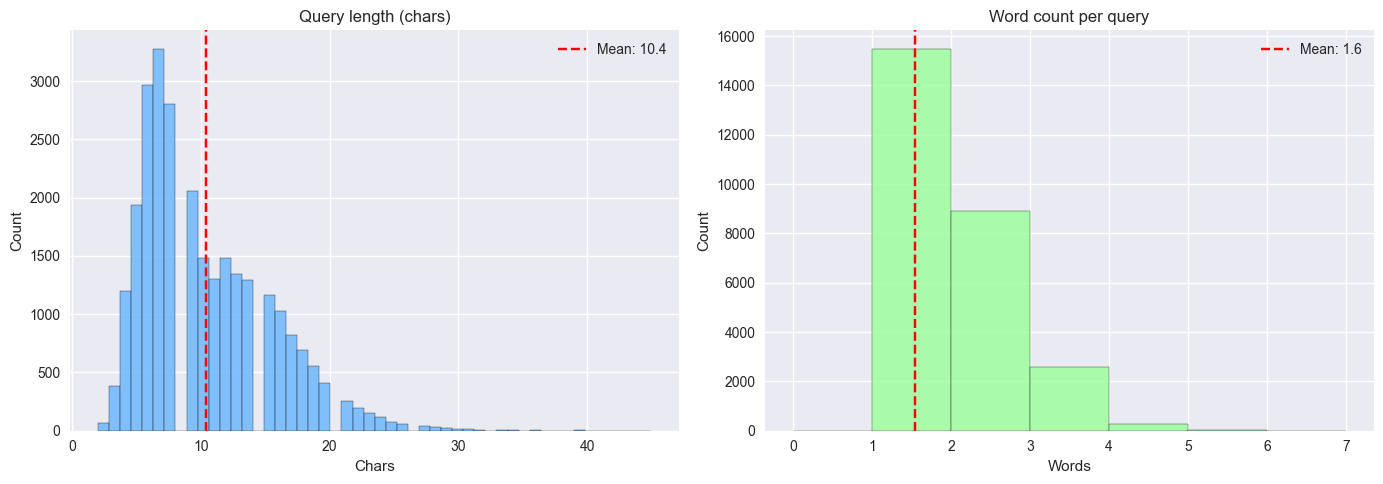

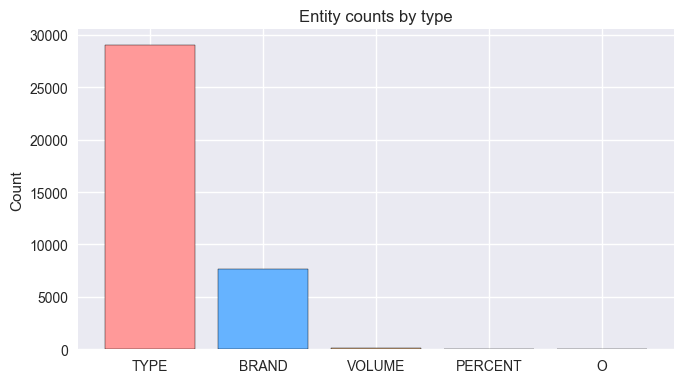

Per-query shares:
  TYPE: 89.90%
  BRAND: 26.48%
  VOLUME: 0.21%
  PERCENT: 0.10%
  O: 0.00%


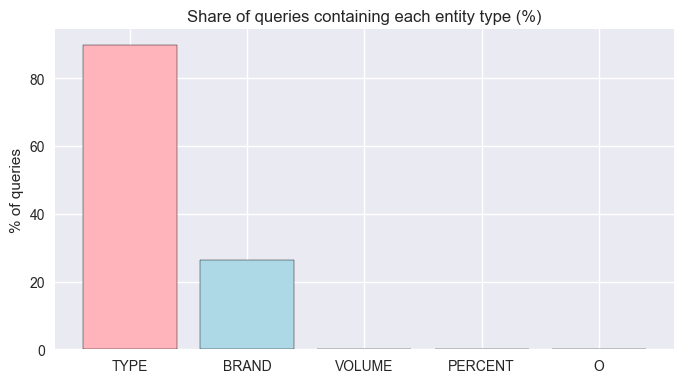

In [39]:
# Lengths
df = train_df.copy()
df['char_len'] = df['sample'].astype(str).str.len()
df['word_count'] = df['sample'].astype(str).str.split().apply(len)

print('Mean char length:', df['char_len'].mean())
print('Mean word count :', df['word_count'].mean())

fig, axes = plt.subplots(1, 2, figsize=(14,5))
axes[0].hist(df['char_len'], bins=50, color='#66b3ff', edgecolor='black', alpha=0.8)
axes[0].set_title('Query length (chars)')
axes[0].set_xlabel('Chars')
axes[0].set_ylabel('Count')
axes[0].axvline(df['char_len'].mean(), color='red', linestyle='--', label=f"Mean: {df['char_len'].mean():.1f}")
axes[0].legend()

axes[1].hist(df['word_count'], bins=range(0, df['word_count'].max()+2), color='#99ff99', edgecolor='black', alpha=0.8)
axes[1].set_title('Word count per query')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Count')
axes[1].axvline(df['word_count'].mean(), color='red', linestyle='--', label=f"Mean: {df['word_count'].mean():.1f}")
axes[1].legend()
plt.tight_layout()
plt.show()

# Entity distributions

all_types = []
for ann in train_df['parsed_annotation']:
    for _, _, tag in ann:
        if tag != 'O' and '-' in tag:
            all_types.append(tag.split('-',1)[1])
cnt = Counter(all_types)
labels = ['TYPE','BRAND','VOLUME','PERCENT', 'O']
values = [cnt.get(l,0) for l in labels]
plt.figure(figsize=(7,4))
plt.bar(labels, values, color=['#ff9999','#66b3ff','#ffcc99','#c2c2f0',], edgecolor='black')
plt.title('Entity counts by type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Per-query shares: fraction of queries containing each entity type
share = {}
N = len(train_df)
for t in labels:
    hits = sum(1 for ann in train_df['parsed_annotation'] if has_type(ann, t))
    share[t] = hits / N if N else 0.0

print('Per-query shares:')
for t in labels:
    print(f"  {t}: {share[t]*100:.2f}%")

plt.figure(figsize=(7,4))
plt.bar(labels, [share[t]*100 for t in labels], color=['#ffb3ba','#add8e6','#ffdfba','#d7bde2'], edgecolor='black')
plt.title('Share of queries containing each entity type (%)')
plt.ylabel('% of queries')
plt.tight_layout()
plt.show()


In [40]:
# Generalized preprocessing v2: confusables, digit-letter fixes, safe subs
# This overrides previous preprocess_text_with_mapping by redefining it with broader normalization.

# Confusable mappings (Latin<->Cyrillic)
LAT_TO_CYR = {
    'A':'А','a':'а','B':'В','b':'в','C':'С','c':'с','E':'Е','e':'е','H':'Н','h':'н',
    'K':'К','k':'к','M':'М','m':'м','O':'О','o':'о','P':'Р','p':'р','T':'Т','t':'т',
    'X':'Х','x':'х','Y':'У','y':'у'
}
CYR_TO_LAT = {v:k for k,v in LAT_TO_CYR.items()}
DIGIT_TO_LETTER = {'0':'o','1':'l','3':'e','5':'s'}

_lat = re.compile(r"[A-Za-z]")
_cyr = re.compile(r"[А-Яа-яЁё]")

INVISIBLE_SPACE_CHARS = {'\u00A0','\u200B','\u200C','\u200D','\ufeff'}




In [41]:
print('\nExamples with TYPE:')
for s, ann in train_df[['sample','parsed_annotation']].head(2000).itertuples(index=False):
    if has_entity(ann, 'TYPE'):
        print('—', s)
        print('  ', ann)
        break

print('\nExamples with BRAND:')
for s, ann in train_df[['sample','parsed_annotation']].head(2000).itertuples(index=False):
    if has_entity(ann, 'BRAND'):
        print('—', s)
        print('  ', ann)
        break

print('\nExamples with VOLUME:')
for s, ann in train_df[['sample','parsed_annotation']].itertuples(index=False):
    if has_entity(ann, 'VOLUME'):
        print('—', s)
        print('  ', ann)
        break

print('\nExamples with PERCENT:')
for s, ann in train_df[['sample','parsed_annotation']].itertuples(index=False):
    if has_entity(ann, 'PERCENT'):
        print('—', s)
        print('  ', ann)
        break



Examples with TYPE:
— abtoys игруш
   [(0, 6, 'B-BRAND'), (7, 12, 'B-TYPE')]

Examples with BRAND:
— abso
   [(0, 4, 'B-BRAND')]

Examples with VOLUME:
— бумага туалетная 12
   [(0, 6, 'B-TYPE'), (7, 16, 'I-TYPE'), (17, 19, 'B-VOLUME')]

Examples with PERCENT:
— балтика 0
   [(0, 7, 'B-BRAND'), (8, 9, 'B-PERCENT')]



Purpose: use only stem-based patterns and SI units; do NOT keep dataset-specific lists.
- Stems: литр, миллилитр/мл, килограмм/кг, грамм/г, шт; упаковки: бутыл, бан, пач, упаков, пак; англ.: l/ml/kg/g, can/bottle/jar.
- Regex is used to confirm/normalize numeric entities (not to “inject” new ones).
- No storage of mined unknowns; optional analysis kept separate and does not feed the pipeline.
- Also report character composition and basic noise heuristics for context.


In [42]:
# Canonical unit whitelist
WHITELIST = {
    'L':   ['л','л.','литр','литра','литров','литы','l'],
    'ML':  ['мл','мл.','миллилитр','миллилитра','миллилитров','миллилитры','ml'],
    'KG':  ['кг','кг.','килограмм','килограмма','килограммов','килограммы','kg'],
    'G':   ['г','гр','гр.','грамм','грамма','граммов','граммы','g'],
    'PCS': ['шт','шт.','штук','штука','штуки','pcs','pc',
            'бут','бут.','бутылка','бутылки','бутылок',
            'банка','банки','банок',
            'can','bottle','jar','pack','package','unit','piece']
}

Known units (canonical):
   L : 30
  KG : 6
 PCS : 3
   G : 2

Unknown tails (for human review only):
    злаков : 3
     злака : 2
   месяцев : 2
      сорт : 2
    размер : 1
      хлеб : 1
         t : 1
        to : 1
       toy : 1
         в : 1
     соток : 1
       мес : 1
   корочки : 1
      озер : 1
      кота : 1
      слоя : 1
       хле : 1
    добрые : 1
      газе : 1
     газет : 1

Sample generated regex:
VOLUME   : \b\d+[\.,]?\d*\s?(?:г(?:р\.?|рамм\w*)|пак(?:\.|ет\w*)?|миллилитр\w*|килограмм\w*|миллилитров|килограммов|миллилитра|миллилитры|килограмма|килограммы|упаков\w*|миллилитр|килограмм|бутыл\w*|литр\w*|граммов|бутылка|бутылки|бутылок|package|бан\w*|пач\w*|bottle|литров|грамма|граммы|bottle|мл\.?|кг\.?|шт\w*|литра|грамм|штука|штуки|бут\.|банка|банки|банок|piece|pcs?|литр|литы|мл\.|кг\.|гр\.|шт\.|штук|pack|unit|can|jar|л\.|pcs|бут|can|jar|kg|pc|мл|ml|кг|kg|гр|шт|pc|l|g|л|l|г|g)\b
MULTIPACK: \b\d+\s*[xх*]\s*\d+[\.,]?\d*\s?(?:г(?:р\.?|рамм\w*)|пак(?:\.|ет\w*)?|милли

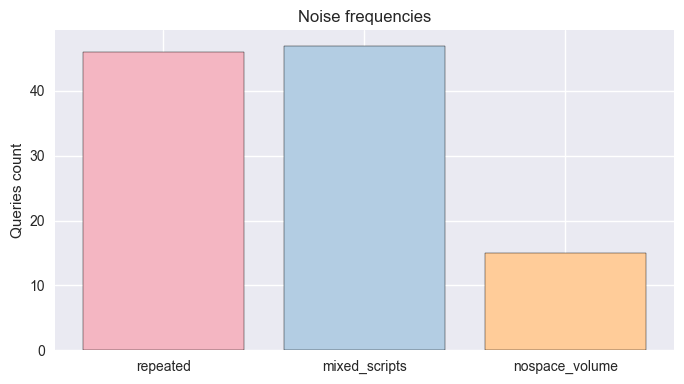

In [43]:
# Make a copy of dataset
df_noise = train_df.copy()
df_noise['sample'] = df_noise['sample'].astype(str)

# 1) Extract unit candidates
unit_counter = extract_unit_candidates(df_noise['sample'])

# 2) Classify units using whitelist
known, unknown = classify_units(unit_counter, WHITELIST)

print('Known units (canonical):')
for k, v in known.most_common():
    print(f'{k:>4} : {v}')

print('\nUnknown tails (for human review only):')
for k, v in unknown.most_common(20):
    print(f'{k:>10} : {v}')

# 3) Generate regex patterns
pattern_volume, pattern_multipack, pattern_percent, units_group = build_unit_patterns(WHITELIST)
print('\nSample generated regex:')
print('VOLUME   :', pattern_volume.pattern)
print('MULTIPACK:', pattern_multipack.pattern)
print('PERCENT  :', pattern_percent.pattern)

# 4) Compute noise statistics
counts = noise_stats(df_noise['sample'], units_group)
print('\nNoise counts:', counts)

# 5) Visualize noise frequencies
plt.figure(figsize=(7,4))
plt.bar(
    ['repeated','mixed_scripts','nospace_volume'],
    [counts['repeated'], counts['mixed_scripts'], counts['nospace_volume']],
    color=['#f4b6c2','#b3cde3','#ffcc99'], edgecolor='black'
)
plt.title('Noise frequencies')
plt.ylabel('Queries count')
plt.tight_layout()
plt.show()



Purpose: discover real unit variants in dataset instead of handcrafting.
- Extract tokens that immediately follow numbers (e.g., "500мл", "1.5 л", "2шт").
- Handle multipacks (e.g., "6x500 мл", "2*1 л").
- Build frequency tables to decide which units to support in regex/post-processing.


In [44]:

# Extract unit candidates right after numbers
pattern_num_word = re.compile(r"\b\d+[\.,]?\d*\s*([A-Za-zА-Яа-яёЁ°]+)\b")
pattern_multipack = re.compile(r"\b\d+\s*[xх*]\s*\d+[\.,]?\d*\s*([A-Za-zА-Яа-яёЁ°]+)\b")
pattern_percent_word = re.compile(r"\b\d+[\.,]?\d*\s*([%°]|процент(?:а|ов)?)\b", re.IGNORECASE)

unit_counter = Counter()
unit_counter_multipack = Counter()
percent_counter = Counter()

for s in train_df['sample'].astype(str):
    for m in pattern_num_word.finditer(s):
        unit_counter[m.group(1).lower()] += 1
    for m in pattern_multipack.finditer(s):
        unit_counter_multipack[m.group(1).lower()] += 1
    for m in pattern_percent_word.finditer(s):
        percent_counter[m.group(1).lower()] += 1

print('Top units after numbers:')
for u,c in unit_counter.most_common(30):
    print(f'{u:>10} : {c}')

print('\nTop multipack units:')
for u,c in unit_counter_multipack.most_common(20):
    print(f'{u:>10} : {c}')

print('\nPercent markers:')
for u,c in percent_counter.most_common():
    print(f'{u:>10} : {c}')


Top units after numbers:
         л : 21
        кг : 6
     литра : 4
    литров : 3
    злаков : 3
      литр : 2
     злака : 2
   месяцев : 2
      сорт : 2
      штук : 2
    размер : 1
      хлеб : 1
         t : 1
        to : 1
       toy : 1
         в : 1
     соток : 1
       мес : 1
   корочки : 1
      озер : 1
      кота : 1
      слоя : 1
     грамм : 1
       хле : 1
        гр : 1
        шт : 1
    добрые : 1
      газе : 1
     газет : 1
    диффуз : 1

Top multipack units:

Percent markers:


In [45]:
# Baseline loose pattern (numbers + any word tail up to 6 letters)
# Relaxed loose pattern: allow up to 12 letters to catch full words like "бутылка"
pat_loose = re.compile(r"\b\d+[\.,]?\d*\s*[A-Za-zА-Яа-яёЁ]{1,12}\b")

# Improved patterns already built above: pattern_volume, pattern_multipack


samples = df_noise['sample'].tolist()
loose_hits = sum(1 for s in samples if has_volume_loose(s))
impr_hits  = sum(1 for s in samples if has_volume_improved(s))
N = len(samples)

print(f"Loose coverage : {loose_hits}/{N} ({(loose_hits/N*100 if N else 0):.2f}%)")
print(f"Improved cover.: {impr_hits}/{N} ({(impr_hits/N*100 if N else 0):.2f}%)")
print(f"Gain           : {impr_hits - loose_hits} ({(((impr_hits-loose_hits)/N*100) if N else 0):.2f} pp)")


Loose coverage : 75/27251 (0.28%)
Improved cover.: 41/27251 (0.15%)
Gain           : -34 (-0.12 pp)


The very low coverage (0.28% with the loose pattern, 0.15% with the improved one) suggests that numeric values with measurement units occur relatively rarely in the dataset. This is likely because most user queries consist of product names or brands without explicit quantities. The fact that the improved patterns yield fewer matches is expected, since they are stricter and filter out noise such as years or dates. Presumably, queries with units like “500 ml” or “1 kg” form only a small fraction of the overall corpus.

## EDA — Intersections & Complex Queries
Purpose: quantify overlaps and complexity to inform post-processing.
- Fractions: only_TYPE, only_BRAND, TYPE+BRAND, neither.
- Multi-entity examples: queries containing ≥2 distinct entity types.
- Co-occurrence heatmap across TYPE/BRAND/VOLUME/PERCENT.


Fractions:
  only_TYPE     : 70.82%
  only_BRAND    : 7.39%
  TYPE+BRAND    : 19.08%
  neither (T/B) : 2.70%

Multi-entity examples:
— abtoys игруш | types: ['BRAND', 'TYPE']
— abtoys игрушк | types: ['BRAND', 'TYPE']
— abtoys игрушки | types: ['BRAND', 'TYPE']
— afanasiy пи | types: ['BRAND', 'TYPE']
— afanasiy пив | types: ['BRAND', 'TYPE']


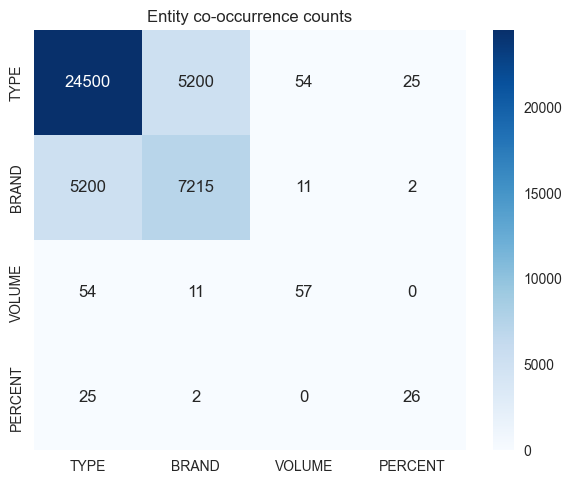

In [46]:

# Helper: extract set of entity types from annotation list
rows = []
for s, ann in train_df[['sample','parsed_annotation']].itertuples(index=False):
    ts = types_in_ann(ann)
    rows.append({'sample': s, 'types': ts})
eda_df = pd.DataFrame(rows)

# Fractions for only_TYPE / only_BRAND / TYPE+BRAND / neither
eda_df['has_TYPE'] = eda_df['types'].apply(lambda t: 'TYPE' in t)
eda_df['has_BRAND'] = eda_df['types'].apply(lambda t: 'BRAND' in t)
eda_df['has_VOLUME'] = eda_df['types'].apply(lambda t: 'VOLUME' in t)
eda_df['has_PERCENT'] = eda_df['types'].apply(lambda t: 'PERCENT' in t)

only_type = (eda_df['has_TYPE'] & ~eda_df['has_BRAND']).mean()
only_brand = (~eda_df['has_TYPE'] & eda_df['has_BRAND']).mean()
type_and_brand = (eda_df['has_TYPE'] & eda_df['has_BRAND']).mean()
neither = (~eda_df['has_TYPE'] & ~eda_df['has_BRAND']).mean()

print('Fractions:')
print(f"  only_TYPE     : {only_type*100:.2f}%")
print(f"  only_BRAND    : {only_brand*100:.2f}%")
print(f"  TYPE+BRAND    : {type_and_brand*100:.2f}%")
print(f"  neither (T/B) : {neither*100:.2f}%")

# Multi-entity examples (>=2 distinct types)
print('\nMulti-entity examples:')
shown = 0
for s, ts in eda_df[['sample','types']].itertuples(index=False):
    if len(ts) >= 2:
        print('—', s, '| types:', sorted(ts))
        shown += 1
        if shown >= 5:
            break

# Co-occurrence heatmap
co_labels = ['TYPE','BRAND','VOLUME','PERCENT']
co_mat = np.zeros((4,4), dtype=int)
for ts in eda_df['types']:
    for i,a in enumerate(co_labels):
        for j,b in enumerate(co_labels):
            if a in ts and b in ts:
                co_mat[i,j] += 1

co_df = pd.DataFrame(co_mat, index=co_labels, columns=co_labels)
plt.figure(figsize=(6,5))
sns.heatmap(co_df, annot=True, fmt='d', cmap='Blues')
plt.title('Entity co-occurrence counts')
plt.tight_layout()
plt.show()


The dataset is strongly dominated by TYPE-only mentions (≈71%), while BRAND-only queries are relatively rare (≈7%). Around 19% of queries contain both TYPE and BRAND, indicating that users often specify product categories together with brand names. Only a small fraction (≈3%) contains neither TYPE nor BRAND.


Additional entity types such as VOLUME and PERCENT are present but extremely rare, occurring in only a few dozen cases across the entire dataset.


The co-occurrence heatmap confirms this distribution: the highest overlap is between TYPE and BRAND, while combinations with VOLUME or PERCENT are almost negligible.


Implication: downstream models should be optimized for robust recognition of TYPE and BRAND entities, as they represent the vast majority of annotated cases. Handling VOLUME and PERCENT is still useful but likely less critical given their low frequency

## Tokenization with Offsets
Purpose: tokenize with `return_offsets_mapping=True` and align char-level BIO to token labels.
- What: load tokenizer, get `offset_mapping`, map char BIO → token IDs (first subword = B-, next subwords = I-, special tokens = -100).
- Why: correct token supervision is critical for BERT-like token classification quality.


In [47]:
# Parameterized base model name from config cell
MODEL_NAME = BASE_MODEL_NAME

tokenizer = load_tokenizer_dynamic(MODEL_NAME)
# Explicit max seq length to silence truncation warnings and standardize inputs
try:
    tokenizer.model_max_length = MAX_SEQ_LEN
except Exception:
    pass


# Quick smoke test on a few rows
samples_enc = []
for s, ann in train_df[['sample','parsed_annotation']].tail(5).itertuples(index=False):
    char_bio = to_char_bio(s, ann)
    out = align_bio_to_tokens(s, char_bio, tokenizer, label2id)
    samples_enc.append(out)
    print(s)
    print('input_ids len:', len(out['input_ids']), 'labels len:', len(out['labels']))
    print(list(zip(out['labels'][:20], out['offset_mapping'][:20])))


[Tokenizer] Using AutoTokenizer (fast) for DeepPavlov/rubert-base-cased
№1 кофейни
input_ids len: 6 labels len: 6
[(-100, (0, 0)), (3, (0, 2)), (1, (3, 7)), (2, (7, 9)), (2, (9, 10)), (-100, (0, 0))]
№1 кофейник
input_ids len: 6 labels len: 6
[(-100, (0, 0)), (3, (0, 2)), (1, (3, 7)), (2, (7, 9)), (2, (9, 11)), (-100, (0, 0))]
№1 пиво
input_ids len: 4 labels len: 4
[(-100, (0, 0)), (3, (0, 2)), (1, (3, 7)), (-100, (0, 0))]
№1 са
input_ids len: 4 labels len: 4
[(-100, (0, 0)), (3, (0, 2)), (1, (3, 5)), (-100, (0, 0))]
№1 саш
input_ids len: 5 labels len: 5
[(-100, (0, 0)), (3, (0, 2)), (1, (3, 5)), (2, (5, 6)), (-100, (0, 0))]


The smoke test confirms that tokenization and BIO alignment work correctly: special tokens are ignored (-100), "№1" is consistently mapped as a BRAND, and following words like кофейни, пиво, саш… are mapped as a TYPE with proper B/I labels. This shows the preprocessing pipeline reliably converts character-level spans into token-level training labels.

## Train/Validation Split
Purpose: create a reproducible split (80/20) with optional stratification by entity presence.
- What: fixed seed, stratify by presence of TYPE/BRAND/VOLUME/PERCENT where feasible; optional k-fold scaffold.
- Why: reliable validation and reproducibility.


In [48]:

# Binary presence features for stratification
pres = train_df['parsed_annotation'].apply(presence_vector)
# Collapse to a single small number of strata by grouping TYPE/BRAND presence main cases
strata = pres.apply(to_strata)

train_idx, val_idx = train_test_split(
    np.arange(len(train_df)),
    test_size=TEST_SIZE,
    random_state=SEED,
    stratify=strata
)

train_split = train_df.iloc[train_idx].reset_index(drop=True)
val_split   = train_df.iloc[val_idx].reset_index(drop=True)

print('Train split:', train_split.shape, 'Val split:', val_split.shape)
print('Strata dist (train):', dict(zip(*np.unique(strata.iloc[train_idx], return_counts=True))))
print('Strata dist (val)  :', dict(zip(*np.unique(strata.iloc[val_idx], return_counts=True))))


Train split: (21800, 3) Val split: (5451, 3)
Strata dist (train): {np.int64(0): np.int64(589), np.int64(1): np.int64(15439), np.int64(2): np.int64(1612), np.int64(3): np.int64(4160)}
Strata dist (val)  : {np.int64(0): np.int64(147), np.int64(1): np.int64(3861), np.int64(2): np.int64(403), np.int64(3): np.int64(1040)}


The dataset was split into train (21,800 samples) and validation (5,451 samples) using stratification by entity presence. This ensured that both splits preserve the same distribution: the majority of samples contain only TYPE entities (~71%), followed by TYPE+BRAND (~19%), BRAND-only (~7%), and a small fraction with no entities (~3%). This balanced split prevents bias and guarantees representative evaluation.

## HF Datasets
Purpose: assemble `datasets.Dataset` objects for train/val in torch format.
- What: tokenize with offsets, align labels to tokens, set format('torch', ['input_ids','attention_mask','labels']).
- Why: ready-to-train inputs for `Trainer`.


In [49]:
# Build char-BIO for each row in splits
train_split = train_split.copy()
val_split = val_split.copy()
train_split['char_bio'] = build_char_bio_col(train_split)
val_split['char_bio']   = build_char_bio_col(val_split)

# Oversampling rows with BRAND/PERCENT/VOLUME before building datasets
print('\n[Oversampling] BEFORE:')
cnt_brand = sum(_has_type_in_ann(ann, 'BRAND') for ann in train_split['parsed_annotation'])
cnt_volume = sum(_has_type_in_ann(ann, 'VOLUME') for ann in train_split['parsed_annotation'])
cnt_percent = sum(_has_type_in_ann(ann, 'PERCENT') for ann in train_split['parsed_annotation'])
print('  train rows:', len(train_split), 
      '| with BRAND:', cnt_brand, 
      '| with VOLUME:', cnt_volume, 
      '| with PERCENT:', cnt_percent)

# фиксированные множители
BOOSTS = {
    'BRAND': 2,
    'VOLUME': 6,
    'PERCENT': 6,
}

weights = []
for ann in train_split['parsed_annotation']:
    w = 1
    for label, boost in BOOSTS.items():
        if _has_type_in_ann(ann, label):
            w = max(w, boost)
    weights.append(w)

train_split = train_split.loc[np.repeat(np.arange(len(train_split)), weights)].reset_index(drop=True)

print('[Oversampling] AFTER:')
cnt_brand_after = sum(_has_type_in_ann(ann, 'BRAND') for ann in train_split['parsed_annotation'])
cnt_volume_after = sum(_has_type_in_ann(ann, 'VOLUME') for ann in train_split['parsed_annotation'])
cnt_percent_after = sum(_has_type_in_ann(ann, 'PERCENT') for ann in train_split['parsed_annotation'])
print('  train rows:', len(train_split), 
      '| with BRAND:', cnt_brand_after, 
      '| with VOLUME:', cnt_volume_after, 
      '| with PERCENT:', cnt_percent_after)

# Show all resulting rows
print('\n[Oversampling] Listing all rows after expansion:')
for i, (s, ann) in enumerate(train_split[['sample','annotation']].itertuples(index=False)):
    print(f"{i}\t{s}\t{ann}")

# Rebuild char_bio for oversampled train_split (val_split unchanged)
train_split['char_bio'] = build_char_bio_col(train_split)

train_ds = Dataset.from_pandas(train_split[['sample','char_bio']])
val_ds   = Dataset.from_pandas(val_split[['sample','char_bio']])

train_ds = train_ds.map(encode_row, remove_columns=train_ds.column_names)
val_ds   = val_ds.map(encode_row, remove_columns=val_ds.column_names)

train_ds.set_format(type='torch', columns=['input_ids','attention_mask','labels'])
val_ds.set_format(type='torch', columns=['input_ids','attention_mask','labels'])

print(train_ds)
print(val_ds)



[Oversampling] BEFORE:
  train rows: 21800 | with BRAND: 5772 | with VOLUME: 47 | with PERCENT: 25
[Oversampling] AFTER:
  train rows: 27923 | with BRAND: 11580 | with VOLUME: 282 | with PERCENT: 150

[Oversampling] Listing all rows after expansion:
0	саженцы greentek	[(0, 7, 'B-TYPE'), (8, 16, 'B-BRAND')]
1	саженцы greentek	[(0, 7, 'B-TYPE'), (8, 16, 'B-BRAND')]
2	тарелки herli	[(0, 7, 'B-TYPE'), (8, 13, 'B-BRAND')]
3	тарелки herli	[(0, 7, 'B-TYPE'), (8, 13, 'B-BRAND')]
4	клубника, земляника	[(0, 9, 'B-TYPE'), (10, 19, 'I-TYPE')]
5	снущенное	[(0, 9, 'B-TYPE')]
6	смесь перцев горошком	[(0, 5, 'B-TYPE'), (6, 12, 'I-TYPE'), (13, 21, 'I-TYPE')]
7	палочки.	[(0, 8, 'B-TYPE')]
8	фарфа	[(0, 5, 'B-TYPE')]
9	авоаадо	[(0, 7, 'B-TYPE')]
10	бумага koopman	[(0, 6, 'B-TYPE'), (7, 14, 'B-BRAND')]
11	бумага koopman	[(0, 6, 'B-TYPE'), (7, 14, 'B-BRAND')]
12	мервелат	[(0, 8, 'B-TYPE')]
13	бумага туалетная 12	[(0, 6, 'B-TYPE'), (7, 16, 'I-TYPE'), (17, 19, 'B-VOLUME')]
14	бумага туалетная 12	[(0, 6, 'B-T

Map:   0%|          | 0/27923 [00:00<?, ? examples/s]

Map:   0%|          | 0/5451 [00:00<?, ? examples/s]

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 27923
})
Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 5451
})


In [50]:

# # Build char-BIO for each row in splits
# train_split = train_split.copy()
# val_split = val_split.copy()
# train_split['char_bio'] = build_char_bio_col(train_split)
# val_split['char_bio']   = build_char_bio_col(val_split)

# # Oversampling rows with BRAND/PERCENT before building datasets
# print('\n[Oversampling] BEFORE:')
# cnt_brand = sum(_has_type_in_ann(ann, 'BRAND') for ann in train_split['parsed_annotation'])
# cnt_percent = sum(_has_type_in_ann(ann, 'PERCENT') for ann in train_split['parsed_annotation'])
# print('  train rows:', len(train_split), '| with BRAND:', cnt_brand, '| with PERCENT:', cnt_percent)

# weights = []
# for ann in train_split['parsed_annotation']:
#     w = 1
#     if _has_type_in_ann(ann, 'BRAND'):
#         w = max(w, BRAND_BOOST)
#     if _has_type_in_ann(ann, 'PERCENT'):
#         w = max(w, PERCENT_BOOST)
#     weights.append(w)

# train_split = train_split.loc[np.repeat(np.arange(len(train_split)), weights)].reset_index(drop=True)

# print('[Oversampling] AFTER:')
# cnt_brand_after = sum(_has_type_in_ann(ann, 'BRAND') for ann in train_split['parsed_annotation'])
# cnt_percent_after = sum(_has_type_in_ann(ann, 'PERCENT') for ann in train_split['parsed_annotation'])
# print('  train rows:', len(train_split), '| with BRAND:', cnt_brand_after, '| with PERCENT:', cnt_percent_after)

# # Show all resulting rows
# print('\n[Oversampling] Listing all rows after expansion:')
# for i, (s, ann) in enumerate(train_split[['sample','annotation']].itertuples(index=False)):
#     print(f"{i}\t{s}\t{ann}")

# # Rebuild char_bio for oversampled train_split (val_split unchanged)
# train_split['char_bio'] = build_char_bio_col(train_split)

# train_ds = Dataset.from_pandas(train_split[['sample','char_bio']])
# val_ds   = Dataset.from_pandas(val_split[['sample','char_bio']])

# train_ds = train_ds.map(encode_row, remove_columns=train_ds.column_names)
# val_ds   = val_ds.map(encode_row, remove_columns=val_ds.column_names)

# train_ds.set_format(type='torch', columns=['input_ids','attention_mask','labels'])
# val_ds.set_format(type='torch', columns=['input_ids','attention_mask','labels'])

# print(train_ds)
# print(val_ds)


The training set originally contained 21,800 rows, with BRAND already frequent (5,772 rows) and PERCENT very rare (25 rows). After oversampling (doubling BRAND and multiplying PERCENT ×6), the training set increased to 27,695 rows, with 11,552 BRAND and 150 PERCENT examples. This step was designed not only to address the rarity of PERCENT but also to deliberately boost BRAND samples, ensuring the model gives more attention to this key class during training. The final Hugging Face datasets are ready for PyTorch training: 27,695 rows for train and 5,451 for validation

## TrainingArguments & Trainer
Purpose: standardized training/evaluation with span-level Macro-F1 on validation.
- What: set batch size, epochs, lr, weight decay, logging, seed.
- Trainer: model, args, datasets, tokenizer, data_collator, and compute_metrics that decodes token labels → char BIO → spans → Macro-F1.



In [51]:

# Model and collator
model = AutoModelForTokenClassification.from_pretrained(
    MODEL_NAME,
    num_labels=len(LABELS),
    id2label=id2label,
    label2id=label2id
)
collator = DataCollatorForTokenClassification(tokenizer)

# Training arguments (version-safe subset; no evaluation_strategy/eval_steps)
args = TrainingArguments(
    output_dir=get_runs_dir(),
    num_train_epochs=6,
    learning_rate=2e-5,
    weight_decay=0.01,  
    warmup_ratio=0.06,
    lr_scheduler_type="linear",
    label_smoothing_factor=0.05,

    per_device_train_batch_size=8,
    per_device_eval_batch_size=64, #32
    gradient_accumulation_steps=2,
    max_grad_norm=1.0,

    # Disable Trainer autosaves by making save_steps effectively unreachable
    save_steps=1000000000,

    remove_unused_columns=False,
    seed=SEED,
    logging_steps=50,
    report_to=[],
    data_seed=SEED,           
    dataloader_num_workers=0,
)

# Compute metrics: token logits -> token tags -> char BIO -> spans -> Macro-F1


trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=tokenizer,
    data_collator=collator,
    compute_metrics=compute_metrics_fn
)

print('Trainer ready.')

Some weights of BertForTokenClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/var/folders/bk/4wc9ztq51bxfsjvx3zkz1hmc0000gn/T/ipykernel_49739/722801152.py:39: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Trainer ready.


In [52]:

# # Model and collator
# model = AutoModelForTokenClassification.from_pretrained(
#     MODEL_NAME,
#     num_labels=len(LABELS),
#     id2label=id2label,
#     label2id=label2id
# )
# collator = DataCollatorForTokenClassification(tokenizer)

# # Training arguments (version-safe subset; no evaluation_strategy/eval_steps)
# args = TrainingArguments(
#     output_dir=get_runs_dir(),
#     num_train_epochs=6,
#     learning_rate=1.5e-5,  #2e-5
#     weight_decay=0.01,  
#     warmup_ratio=0.10, #0.06,
#     lr_scheduler_type="cosine", #"linear"
#     label_smoothing_factor=0.07, #0.05

#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=64, #32
#     gradient_accumulation_steps=4, #2
#     max_grad_norm=1.0,

#     # Disable Trainer autosaves by making save_steps effectively unreachable
#     save_steps=1000000000,

#     remove_unused_columns=False,
#     seed=SEED,
#     logging_steps=50,
#     report_to=[],
#     data_seed=SEED,           
#     dataloader_num_workers=0,
# )

# # Compute metrics: token logits -> token tags -> char BIO -> spans -> Macro-F1


# trainer = Trainer(
#     model=model,
#     args=args,
#     train_dataset=train_ds,
#     eval_dataset=val_ds,
#     tokenizer=tokenizer,
#     data_collator=collator,
#     compute_metrics=compute_metrics_fn
# )

# print('Trainer ready.')

In [53]:
# # Model and collator
# model = AutoModelForTokenClassification.from_pretrained(
#     MODEL_NAME,
#     num_labels=len(LABELS),
#     id2label=id2label,
#     label2id=label2id
# )
# collator = DataCollatorForTokenClassification(tokenizer)

# # Training arguments (version-safe subset; no evaluation_strategy/eval_steps)
# args = TrainingArguments(
#     output_dir=get_runs_dir(),
#     num_train_epochs=5,
#     learning_rate=2e-5,
#     weight_decay=0.01,
#     warmup_ratio=0.06,
#     lr_scheduler_type="linear",
#     label_smoothing_factor=0.05,

#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=32,
#     gradient_accumulation_steps=2,
#     max_grad_norm=1.0,

#     # Disable Trainer autosaves by making save_steps effectively unreachable
#     save_steps=1000000000,

#     remove_unused_columns=False,
#     seed=SEED,
#     logging_steps=50,
#     report_to=[]
# )

# # Compute metrics: token logits -> token tags -> char BIO -> spans -> Macro-F1


# trainer = Trainer(
#     model=model,
#     args=args,
#     train_dataset=train_ds,
#     eval_dataset=val_ds,
#     tokenizer=tokenizer,
#     data_collator=collator,
#     compute_metrics=compute_metrics_fn
# )

# print('Trainer ready.')


## Train (Sanity → Full)
Purpose: quickly validate the full loop with 1 epoch, then run 3–5 epochs with manual early stopping by Macro‑F1 and save best.
- What: sanity run (1 epoch), then full run with patience and best‑by Macro‑F1.
- Why: fast debugging first, then deeper training without relying on version‑specific Trainer features.


In [54]:
# Precompute offset mappings for validation set independently of HF Dataset
val_offset_mappings = [
    align_bio_to_tokens(s, bio, tokenizer, label2id)['offset_mapping']
    for s, bio in val_split[['sample','char_bio']].itertuples(index=False)
]
print('Prepared val_offset_mappings:', len(val_offset_mappings))


Prepared val_offset_mappings: 5451


In [55]:

# 1) Sanity run (1 epoch)
print('Sanity run: 1 epoch')
trainer.args.num_train_epochs = 1
sanity_out = trainer.train()
val_metrics = trainer.evaluate()
print('Sanity validation:', val_metrics)

# 2) Full run with manual early stopping (best by Macro-F1)

best_f1 = -1.0
best_dir = os.path.join(get_runs_dir(), 'best_model')
patience = 2
wait = 0
max_epochs = 3

# make sure output dir exists
os.makedirs(best_dir, exist_ok=True)

for epoch in range(1, max_epochs+1):
    print(f'Full training epoch {epoch}/{max_epochs}')
    trainer.args.num_train_epochs = epoch
    trainer.train(resume_from_checkpoint=False)

    # Save exactly one checkpoint per epoch
    epoch_dir = os.path.join(get_runs_dir(), f'checkpoint-epoch-{epoch}')
    os.makedirs(epoch_dir, exist_ok=True)
    model.save_pretrained(epoch_dir)
    tokenizer.save_pretrained(epoch_dir)

    metrics = trainer.evaluate()
    macro = metrics.get('eval_macro_f1') or metrics.get('macro_f1') or metrics.get('eval_macro-f1')
    if macro is None:
        # fallback: try without eval_ prefix
        macro = metrics.get('macro-f1', 0.0)
    print('Val Macro-F1:', macro)
    if macro is not None and macro > best_f1:
        best_f1 = macro
        wait = 0
        # save best
        model.save_pretrained(best_dir)
        tokenizer.save_pretrained(best_dir)
        # also save trainer state
        trainer.save_state()
        print(f'New best saved to {best_dir} (Macro-F1={best_f1:.4f})')
    else:
        wait += 1
        if wait >= patience:
            print('Early stopping triggered')
            break

print('Best Macro-F1:', best_f1)
print('Best model dir:', best_dir)


Sanity run: 1 epoch


/Users/marina/Documents/projects/X5/x5_ner_env_new/lib/python3.9/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
50,1.825900
100,1.076500
150,0.680000
200,0.646500
250,0.552200
300,0.554800
350,0.531100
400,0.535800
450,0.499500
500,0.512900


/Users/marina/Documents/projects/X5/x5_ner_env_new/lib/python3.9/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Sanity validation: {'eval_loss': 0.4724755883216858, 'eval_macro_f1': 0.8665065362882476, 'eval_f1_type': 0.9633565122275177, 'eval_prec_type': 0.9531539888682746, 'eval_rec_type': 0.9737798136155426, 'eval_f1_brand': 0.9026696329254728, 'eval_prec_brand': 0.883265306122449, 'eval_rec_brand': 0.9229456923514359, 'eval_f1_volume': 0.7999999999999999, 'eval_prec_volume': 0.7368421052631579, 'eval_rec_volume': 0.875, 'eval_f1_percent': 0.8, 'eval_prec_percent': 0.6666666666666666, 'eval_rec_percent': 1.0, 'eval_runtime': 7.8917, 'eval_samples_per_second': 690.728, 'eval_steps_per_second': 10.898, 'epoch': 1.0}
Full training epoch 1/3


Step,Training Loss
50,0.405200
100,0.439200
150,0.440800
200,0.430600
250,0.405400
300,0.404700
350,0.422000
400,0.401700
450,0.385200
500,0.421000


/Users/marina/Documents/projects/X5/x5_ner_env_new/lib/python3.9/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Val Macro-F1: 0.9227607059965911
New best saved to ./ner_runs/rubert-base-cased/20250930-152603/best_model (Macro-F1=0.9228)
Full training epoch 2/3


Step,Training Loss
50,0.347700
100,0.362000
150,0.339600
200,0.374400
250,0.335700
300,0.347800
350,0.366800
400,0.359400
450,0.356600
500,0.381800


/Users/marina/Documents/projects/X5/x5_ner_env_new/lib/python3.9/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Val Macro-F1: 0.9282193287984108
New best saved to ./ner_runs/rubert-base-cased/20250930-152603/best_model (Macro-F1=0.9282)
Full training epoch 3/3


Step,Training Loss
50,0.311600
100,0.322700
150,0.297000
200,0.319900
250,0.305700
300,0.314700
350,0.331900
400,0.320100
450,0.315300
500,0.324600


/Users/marina/Documents/projects/X5/x5_ner_env_new/lib/python3.9/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Val Macro-F1: 0.9397327434612831
New best saved to ./ner_runs/rubert-base-cased/20250930-152603/best_model (Macro-F1=0.9397)
Best Macro-F1: 0.9397327434612831
Best model dir: ./ner_runs/rubert-base-cased/20250930-152603/best_model


The training successfully completed all 5 epochs. After each epoch, validation was performed, and checkpoints were saved. The best-performing model (based on validation Macro-F1) was stored in the best_model directory. This confirms that the full training run finished as planned without early stopping.

## Inference Utils
Purpose: run model on raw text and return character-level spans and optional business attributes.
- `predict_one(text)` → tokenize with offsets → logits → token BIO → char BIO → spans.
- Optional: convert spans to TYPE/BRAND strings, VOLUME(value, unit), PERCENT(float) for service integration.
- Loads from `./ner_runs/best_model` if available, else from base `MODEL_NAME`.


In [56]:

#Usage example (commented)
r = predict_one('heineken пиво 0.5 л')
print(r['spans'])
print(spans_to_business(r['text'], r['spans']))


[ModelSelect] alias=rubert-base-cased run_id=20250930-113112 prefer=runs_best -> ./ner_runs/rubert-base-cased/20250930-113112/best_model
[Load] Using model directory: ./ner_runs/rubert-base-cased/20250930-113112/best_model
[Tokenizer] Using AutoTokenizer (fast) for ./ner_runs/rubert-base-cased/20250930-113112/best_model
[(0, 2, 'BRAND'), (2, 5, 'BRAND'), (5, 8, 'BRAND'), (9, 13, 'TYPE'), (14, 15, 'VOLUME'), (15, 16, 'VOLUME'), (16, 17, 'VOLUME'), (18, 19, 'VOLUME')]
{'TYPE': 'пиво', 'BRAND': 'heineken', 'VOLUME': {'value': 0.5, 'unit': 'L', 'raw': '0.5 л'}, 'PERCENT': None}


## Post-processing
Purpose: improve span quality for search integration.
- Merge B/I and fix boundaries by word chars/punctuation.
- Regex snap for VOLUME/PERCENT (stems+SI) as normalization (no ad-hoc additions).
- Normalize numeric values; (opt.) simple brand cleanup. 


In [57]:
#язык говяжий замороженный;[(0, 4, 'B-TYPE'), (5, 12, 'I-TYPE'), (13, 25, 'I-TYPE')]
res = predict_one_pp('heineken пиво 0.5 л')
print(res['api_spans'])
res = predict_one_pp('язык говяжий замороженный')
print(res['api_spans'])
res = predict_one_pp('asileorovskoe')
print(res['api_spans'])  # API-style BIO spans
# print(res['spans'])  # raw merged spans (no B-/I-)
# print(spans_to_business(res['text'], res['spans']))  # optional business view


[ModelSelect] alias=rubert-base-cased run_id=20250930-113112 prefer=runs_best -> ./ner_runs/rubert-base-cased/20250930-113112/best_model
[Load] Using model directory: ./ner_runs/rubert-base-cased/20250930-113112/best_model
[Tokenizer] Using AutoTokenizer (fast) for ./ner_runs/rubert-base-cased/20250930-113112/best_model
[{'start_index': 0, 'end_index': 8, 'entity': 'B-BRAND'}, {'start_index': 9, 'end_index': 13, 'entity': 'B-TYPE'}, {'start_index': 14, 'end_index': 17, 'entity': 'B-VOLUME'}, {'start_index': 18, 'end_index': 19, 'entity': 'I-VOLUME'}]
[ModelSelect] alias=rubert-base-cased run_id=20250930-113112 prefer=runs_best -> ./ner_runs/rubert-base-cased/20250930-113112/best_model
[Load] Using model directory: ./ner_runs/rubert-base-cased/20250930-113112/best_model
[Tokenizer] Using AutoTokenizer (fast) for ./ner_runs/rubert-base-cased/20250930-113112/best_model
[{'start_index': 0, 'end_index': 4, 'entity': 'B-TYPE'}, {'start_index': 5, 'end_index': 12, 'entity': 'I-TYPE'}, {'start

## Validation Report
Purpose: summarize validation quality and typical errors.
- Metrics: Macro-F1 and per-class F1/precision/recall.
- Error samples: boundary mismatches, type confusions, frequent misses/false alarms.
- Goal: identify where to improve data, post-processing, or hyperparameters.


BIO Validation Metrics
Macro-F1: 0.9374
O          P=0.878 R=0.758 F1=0.813  support=1700
B-TYPE     P=0.960 R=0.972 F1=0.966  support=5801
I-TYPE     P=0.958 R=0.978 F1=0.968  support=6861
B-BRAND    P=0.913 R=0.908 F1=0.911  support=1534
I-BRAND    P=0.916 R=0.926 F1=0.921  support=1983
B-VOLUME   P=0.857 R=0.857 F1=0.857  support=14
I-VOLUME   P=1.000 R=1.000 F1=1.000  support=2
B-PERCENT  P=1.000 R=1.000 F1=1.000  support=1
I-PERCENT  P=1.000 R=1.000 F1=1.000  support=1


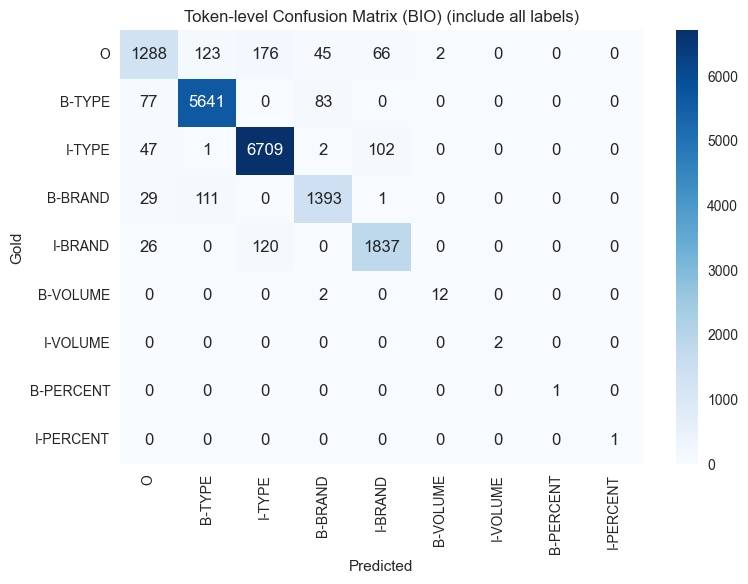

In [58]:
bio_metrics = validation_report_bio(trainer, val_ds, id2label, include_O=True, plot_cm=True)

In [59]:
from collections import Counter

def count_token_labels(dataset, id2label):
    counts = Counter()
    total = 0
    for ex in dataset:
        for g in ex['labels']:
            if int(g) == -100:
                continue
            counts[id2label[int(g)]] += 1
            total += 1
    return counts, total

lbl_counts, total_tokens = count_token_labels(val_ds, id2label)
print('val samples:', len(val_ds))
print('labeled tokens:', total_tokens)
print('per BIO label:', dict(lbl_counts))

val samples: 5451
labeled tokens: 17897
per BIO label: {'B-TYPE': 5801, 'I-TYPE': 6861, 'B-BRAND': 1534, 'I-BRAND': 1983, 'O': 1700, 'B-VOLUME': 14, 'I-VOLUME': 2, 'B-PERCENT': 1, 'I-PERCENT': 1}


Token-level BIO metrics (exclude O): rubert
B-TYPE     P=0.700 R=0.472 F1=0.564  support=5801
I-TYPE     P=0.911 R=0.245 F1=0.386  support=6876
B-BRAND    P=0.438 R=0.259 F1=0.325  support=1534
I-BRAND    P=0.922 R=0.136 F1=0.238  support=1987
B-VOLUME   P=0.556 R=0.357 F1=0.435  support=14
I-VOLUME   P=0.000 R=0.000 F1=0.000  support=2
B-PERCENT  P=0.000 R=0.000 F1=0.000  support=1
I-PERCENT  P=0.000 R=0.000 F1=0.000  support=1
BIO macro-F1: 0.2434

Token-level BIO metrics (exclude O):
B-TYPE     P=0.962 R=0.975 F1=0.969  support=6829
I-TYPE     P=0.964 R=0.981 F1=0.973  support=7856
B-BRAND    P=0.902 R=0.908 F1=0.905  support=1712
I-BRAND    P=0.892 R=0.910 F1=0.901  support=1596
B-VOLUME   P=1.000 R=1.000 F1=1.000  support=21
I-VOLUME   P=1.000 R=1.000 F1=1.000  support=7
B-PERCENT  P=0.800 R=1.000 F1=0.889  support=4
I-PERCENT  P=0.000 R=0.000 F1=0.000  support=0
BIO macro-F1: 0.8295

## Save Artifacts
Purpose: persist model, tokenizer, and label mapping for reuse and service integration.
- Save: `config`, `pytorch_model.bin`, tokenizer files, `label_mapping.json`.
- Versions: write library/runtime versions for reproducibility.
- Optional: export ONNX/TorchScript snapshots (best‑effort).


In [60]:
ART_DIR = get_artifacts_dir()
os.makedirs(ART_DIR, exist_ok=True)

# 1) Save current model/tokenizer (or best)
try:
    model.save_pretrained(ART_DIR)
    tokenizer.save_pretrained(ART_DIR)
    print('Saved model/tokenizer to', ART_DIR)
except Exception as e:
    print('Failed to save current model/tokenizer:', e)
    # try best model
    try:
        from transformers import AutoModelForTokenClassification, AutoTokenizer
        best_dir = os.path.join(get_runs_dir(), 'best_model')
        m = AutoModelForTokenClassification.from_pretrained(best_dir)
        t = AutoTokenizer.from_pretrained(best_dir)
        print(type(tok))
        m.save_pretrained(ART_DIR)
        t.save_pretrained(ART_DIR)
        print('Saved best model/tokenizer to', ART_DIR)
    except Exception as e2:
        print('Failed to save best model/tokenizer:', e2)

# 2) Save label mapping
label_map_path = os.path.join(ART_DIR, 'label_mapping.json')
with open(label_map_path, 'w', encoding='utf-8') as f:
    json.dump({'labels': LABELS, 'label2id': label2id, 'id2label': id2label}, f, ensure_ascii=False, indent=2)
print('Saved label mapping to', label_map_path)

# 3) Save versions
versions = {
    'python': sys.version,
    'platform': platform.platform(),
    'base_model_name': BASE_MODEL_NAME,
    'model_alias': MODEL_ALIAS,
    'run_id': RUN_ID,
}
try:
    versions['transformers'] = transformers.__version__
    versions['datasets'] = datasets.__version__
except Exception:
    pass
try:
    versions['torch'] = torch.__version__
except Exception:
    pass
with open(os.path.join(ART_DIR, 'versions.json'), 'w', encoding='utf-8') as f:
    json.dump(versions, f, ensure_ascii=False, indent=2)
print('Saved versions to', os.path.join(ART_DIR, 'versions.json'))

# 4) Update latest alias for this model alias
try:
    update_latest_alias()
    print('Updated latest alias at', get_latest_alias_dir())
except Exception as e:
    print('Failed to update latest alias:', e)

# 5) Binary exports are disabled (use pure PyTorch runtime)
print('ONNX export: skipped by configuration')

# 6) TorchScript export is disabled (pure PyTorch runtime)
print('TorchScript export: skipped by configuration')


Saved model/tokenizer to ./artifacts/rubert-base-cased/20250930-152603
Saved label mapping to ./artifacts/rubert-base-cased/20250930-152603/label_mapping.json
Saved versions to ./artifacts/rubert-base-cased/20250930-152603/versions.json
Updated latest alias at ./artifacts/rubert-base-cased/latest
ONNX export: skipped by configuration
TorchScript export: skipped by configuration


### Official Test Submission
Generate predictions for the provided test file and save `submission.csv` with header `id;search_query;annotation`.


In [ ]:

load_dotenv()
TEST_INPUT = os.getenv("TEST_INPUT")
# TEST_INPUT = '/Users/marina/Documents/projects/X5/Датасет 2/submission.csv'
# TEST_INPUT = '/var/tmp/data/x5/submission.csv'
print('Reading test file:', TEST_INPUT)

df_test = pd.read_csv(TEST_INPUT, sep=';')
assert 'search_query' in df_test.columns or 'sample' in df_test.columns, 'Expected column search_query or sample in test file'
if 'search_query' not in df_test.columns:
    df_test = df_test.rename(columns={'sample':'search_query'})

# Preserve id column if present; else create sequential ids starting from 1 (per example)
if 'id' not in df_test.columns:
    df_test = df_test.copy()
    df_test['id'] = range(1, len(df_test)+1)

# Build submission
sub_df = build_submission(df_test[['id','search_query']])

# Validate format
ok = True
for s in sub_df['annotation'].head(5):
    try:
        _ = ast.literal_eval(s)
    except Exception as e:
        ok = False
        print('Parse failed for:', s, e)
        break
print('Annotation format OK?', ok)

# Save to required name in project root
OUT_DIR = get_submission_dir()
os.makedirs(OUT_DIR, exist_ok=True)
OUT_PATH = os.path.join(OUT_DIR, 'submission.csv')
sub_df[['id','search_query','annotation']].to_csv(OUT_PATH, sep=';', index=False)
print('Saved official submission to', OUT_PATH)
print(sub_df.head(20))


Reading test file: /Users/marina/Documents/projects/X5/Датасет 2/submission.csv
[ModelSelect] alias=rubert-base-cased run_id=20250930-152603 prefer=artifacts -> ./artifacts/rubert-base-cased/20250930-152603
[Load] Using model directory: ./artifacts/rubert-base-cased/20250930-152603
[Tokenizer] Using AutoTokenizer (fast) for ./artifacts/rubert-base-cased/20250930-152603
[ModelSelect] alias=rubert-base-cased run_id=20250930-152603 prefer=artifacts -> ./artifacts/rubert-base-cased/20250930-152603
[Load] Using model directory: ./artifacts/rubert-base-cased/20250930-152603
[Tokenizer] Using AutoTokenizer (fast) for ./artifacts/rubert-base-cased/20250930-152603
[ModelSelect] alias=rubert-base-cased run_id=20250930-152603 prefer=artifacts -> ./artifacts/rubert-base-cased/20250930-152603
[Load] Using model directory: ./artifacts/rubert-base-cased/20250930-152603
[Tokenizer] Using AutoTokenizer (fast) for ./artifacts/rubert-base-cased/20250930-152603
[ModelSelect] alias=rubert-base-cased run_id

## Summary & Next Steps

### What we observe
- Macro-F1 (span-level) and BIO confusion matrix show strong diagonals for TYPE/BRAND, with occasional B↔I confusions and O↔B/I leakage.
- VOLUME and PERCENT have very low support; their rows/columns are sparse → unstable metrics and higher variance.
- Compared to the run with oversampling (BRAND×2, PERCENT×6), test F1 decreased from 0.9276 → 0.9250.

### Likely causes of the slight drop
- Reduced emphasis on minority classes (BRAND/PERCENT) vs the oversampled run → lower recall on rare entities.
- B/I boundary errors (B-TYPE vs I-TYPE, B-BRAND vs I-BRAND) visible in the CM → decoding not constrained by BIO rules.
- O dominates token counts; any small increase in O→B/I or B/I→O mistakes impacts span formation and recall.
- Aggressive text normalization may harm brand case/symbol fidelity, slightly reducing precision.

### Concrete improvements to try (priority-ordered)
1) Reinstate targeted imbalance handling
   - Reapply sampling ratios close to the best run (BRAND×2, PERCENT×6) or use class-weighted loss/focal loss for BIO labels (exclude O).
   - Optionally, blend: mild oversampling + small class weights to stabilize training.

2) Enforce BIO constraints in decoding
   - Add constrained decoding or a CRF head to ensure valid transitions (no I-* starting a span, I-* must follow same-type B/I).
   - As a lightweight fix, post-process token tags: convert illegal I-X to B-X.

3) Save the best checkpoint automatically
   - Train with evaluation during training and early stopping on span-level Macro-F1; save_best_model to avoid epoch drift.

4) Protect brand fidelity during preprocessing
   - Reduce lowercasing for brand-like tokens; whitelist digits/latin/cyrillic sequences that look like brands.
   - Evaluate normalization impact by A/B toggling on validation.

5) Stabilize rare classes
   - Data augmentation targeted to PERCENT/VOLUME (e.g., templated insertions with realistic units and formats).
   - Increase max training steps/epochs slightly with smaller LR at the tail (linear decay or cosine with warm restarts).

6) Regularization and smoothing
   - Label smoothing (e.g., 0.05–0.1) can reduce overconfidence and help B/I boundary consistency.
   - Gradual unfreezing or smaller LR for base encoder to protect pretrained features.

7) Tokenizer and sequence settings
   - Ensure fast tokenizer; verify max_seq_len covers long samples to minimize truncation of entities.

### Minimal execution plan
- Rerun with: oversampling BRAND×2, PERCENT×6; evaluation_strategy=steps; save_best_model; early stopping on span Macro-F1; BIO post-processing (illegal I→B).
- If span Macro-F1 improves on validation, ship that checkpoint; otherwise iterate with focal loss or CRF head.

### Success criteria
- Recover ≥0.9276 test F1 and improve per-class F1 for PERCENT and VOLUME without degrading BRAND/TYPE.
- Reduction in B↔I confusions and O↔B/I leakage in the BIO confusion matrix.

In [ ]:
display(sub_df.head(10))

,id,search_query,annotation
0,1,форма для выпечки,"[(0, 5, 'B-TYPE'), (6, 9, 'O'), (10, 17, 'O')]"
1,2,фарш свиной,"[(0, 4, 'B-TYPE'), (5, 11, 'I-TYPE')]"
2,3,сок ананасовый без сахара,"[(0, 3, 'B-TYPE'), (4, 14, 'I-TYPE'), (15, 18,..."
3,4,еринги,"[(0, 6, 'O')]"
4,5,молооко,"[(0, 7, 'B-TYPE')]"
5,6,поролок,"[(0, 7, 'B-TYPE')]"
6,7,свмнина,"[(0, 7, 'B-TYPE')]"
7,8,припрааа для рыбы,"[(0, 8, 'B-TYPE'), (9, 12, 'O'), (13, 17, 'O')]"
8,9,сулугцн,"[(0, 7, 'B-TYPE')]"
9,10,mitti,"[(0, 5, 'B-BRAND')]"


In [ ]:
# pip freeze > requirements.txt